# DNA and RNA Dynamics Report July 2020
## Bioinformatics Master, University of Bologna
### Immanuela Antigone Engländer

|Step|Description       |       |
|----|--------------------|-----|
|n.a.| Student            | 9    |
|3   | Address            | 10737353    | 
|5   | detPvalue threshold| 0.05    | 
|7   | Normalization      | preprocessNoob| 
|9   | Normalizaiton      | t-test|
 

We will analyze the methylation patterns of eight subjects  of whome four have down’s syndrome (DS). The remaining four carry the wild type phenotype (WT). We will explore the differential gene expression of these two groups. The *HumanMethylation450 BeadChip* was used for analyzing methylation levels within and outside of CqG islands of the two groups of subjects. This kit provides for each CpG island:
   
* one bead for:
     * the island
     * the corresponding shore
     * the corresponding shelf
     * open sea

It contains both *Infinum I* and *Infinum II* probes. The first is mostly used in GpG islands while the second is used for intergenic regions. The HumanMethylation450 BeadChip assay provided good estimation and  coverage of the investigation of our sites of interest.

| Sample_Name | Group | Age | Slide      | Array  | Basename          |
|-------------|-------|-----|------------|--------|-------------------|
| 1020        | DS    | 29  | 5775278051 | R01C01 | 5775278051_R01C01 |
| 1036        | DS    | 34  | 5775278051 | R04C02 | 5775278051_R04C02 |
| 3038        | WT    | 46  | 5775278078 | R02C01 | 5775278078_R02C01 |
| 3042        | WT    | 32  | 5775278078 | R05C01 | 5775278078_R05C01 |
| 3052        | WT    | 31  | 5775278078 | R05C02 | 5775278078_R05C02 |
| 1016        | DS    | 43  | 5930514034 | R01C02 | 5930514034_R01C02 |
| 1029        | DS    | 32  | 5930514035 | R04C02 | 5930514035_R04C02 |
| 3029        | WT    | 35  | 5930514035 | R06C02 | 5930514035_R06C02 |

For this report [R](https://www.r-project.org/), a free software environment for statistical computing and graphics, was employed taking advantage of the [*minfi*](http://www.bioconductor.org/packages/release/bioc/html/minfi.html) library. This library contains suitable tools for the analysis of microarrays. The code of each steps of the workflow is provided in the following, to prove reproducibility of our results.

Since we are starting a new session, we must delete any object present in the worksession. Then we need to set the working directory and load the data and the necessary library. To avoid displaying all messages we can use a special cmd. 

In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("IlluminaHumanMethylation450kmanifest")

Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.2 (2020-06-22)

Installing package(s) 'IlluminaHumanMethylation450kmanifest'

installing the source package ‘IlluminaHumanMethylation450kmanifest’


Old packages: 'DelayedMatrixStats', 'Rcpp', 'XML', 'gplots', 'rhdf5', 'tibble'



In [2]:
# removing previous objects from previous jobs 
rm(list=ls()) 

# setting the working directory, to the folder where the needed data is located.
setwd("~/01-Unibo/6_DNA_RNA_Dynamics/DRD_Report_07_2020") 

#loading the necessary libraries without printing std out 
suppressMessages(library(minfi))
suppressMessages(library(gplots))
suppressMessages(library(gap))



# loading information of each subject and storing it into the variable SampleSheet
SampleSheet = read.table("./input_d/Samplesheet_report_2020.csv", sep=",", header=T)

We had to load the raw data of each patient by setting the *base directory* (```baseDir```) using the absolute path. The ```baseDir``` contains all files containing biological and technical data of each sample. The information is saved into a variable and stored in an object called RGset, where R stands for red and G stands for green. The variable name indicates therefore that it contains data of both fuorescence intensities of Cy5 (red) and Cy3 (green). By using the *data frame* function we can visualize the two flourescenses seperately and assign each color to one object.

# 1. 
#### Loading the raw data with *minfi* and creating an object called *RGset* storing the *RGChannelSet* object

In [3]:
# setting the base directoriy
baseDir = ("~/01-Unibo/6_DNA_RNA_Dynamics/DRD_Report_07_2020/input_d")
targets = read.metharray.sheet(baseDir)

targets

[read.metharray.sheet] Found the following CSV files:



[1] "/Users/ila/01-Unibo/6_DNA_RNA_Dynamics/DRD_Report_07_2020/input_d/Samplesheet_report_2020.csv"


Sample_Name,Group,Age,Slide,Array,Basename
<int>,<chr>,<int>,<chr>,<chr>,<chr>
1020,DS,29,5775278051,R01C01,/Users/ila/01-Unibo/6_DNA_RNA_Dynamics/DRD_Report_07_2020/input_d/5775278051_R01C01
1036,DS,34,5775278051,R04C02,/Users/ila/01-Unibo/6_DNA_RNA_Dynamics/DRD_Report_07_2020/input_d/5775278051_R04C02
3038,WT,46,5775278078,R02C01,/Users/ila/01-Unibo/6_DNA_RNA_Dynamics/DRD_Report_07_2020/input_d/5775278078_R02C01
3042,WT,32,5775278078,R05C01,/Users/ila/01-Unibo/6_DNA_RNA_Dynamics/DRD_Report_07_2020/input_d/5775278078_R05C01
3052,WT,31,5775278078,R05C02,/Users/ila/01-Unibo/6_DNA_RNA_Dynamics/DRD_Report_07_2020/input_d/5775278078_R05C02
1016,DS,43,5930514034,R01C02,/Users/ila/01-Unibo/6_DNA_RNA_Dynamics/DRD_Report_07_2020/input_d/5930514034_R01C02
1029,DS,32,5930514035,R04C02,/Users/ila/01-Unibo/6_DNA_RNA_Dynamics/DRD_Report_07_2020/input_d/5930514035_R04C02
3029,WT,35,5930514035,R06C02,/Users/ila/01-Unibo/6_DNA_RNA_Dynamics/DRD_Report_07_2020/input_d/5930514035_R06C02


In [4]:
# Creating the RG set for red and green signals
RGset = read.metharray.exp(targets = targets)

# saving it
save(RGset,file="RGset.RData")
RGset # the warnings are specific to R version 4  in Jupyter notebooks - its not a problem - I checked the documentation as per today there is no way to surpress it.

Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string 

ERROR: Error in surpressMessages(RGset): could not find function "surpressMessages"


# 2.
#### Creating one *dataframe* for each, holding the fluorecence-colour and storing each intensity.
Starting with red:

In [5]:
Red = data.frame(getRed(RGset))
dim(Red)
head(Red)

[1] 622399      8

,X5775278051_R01C01,X5775278051_R04C02,X5775278078_R02C01,X5775278078_R05C01,X5775278078_R05C02,X5930514034_R01C02,X5930514035_R04C02,X5930514035_R06C02
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
10600313,816,1055,603,647,583,441,463,606
10600322,2269,2965,1840,2103,2228,1383,1823,2315
10600328,1673,2500,1420,1588,1600,3456,2773,2540
10600336,18318,21740,16924,17981,16158,16169,18221,19048
10600345,4141,4575,3198,3123,3233,3424,3336,3595
10600353,1433,1680,1228,1211,1141,1164,975,1136


Doing the same for green

In [6]:
Green = data.frame(getGreen(RGset))
dim(Green)
head(Green)

[1] 622399      8

,X5775278051_R01C01,X5775278051_R04C02,X5775278078_R02C01,X5775278078_R05C01,X5775278078_R05C02,X5930514034_R01C02,X5930514035_R04C02,X5930514035_R06C02
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
10600313,373,494,278,360,321,210,198,350
10600322,7413,10620,6667,8362,7963,6896,8344,9709
10600328,2369,2375,1995,2179,2401,2954,3222,2806
10600336,1734,2060,1456,1775,1757,1152,1702,1617
10600345,3400,4416,3590,3665,3559,2975,3516,4530
10600353,4233,4873,3790,3406,3693,2973,3371,3983


Illumina provides a the [*Infinum Methylation450K Manifest*](http://support.illumina.com/array/array_kits/infinium_humanmethylation450_beadchip_kit/downloads.html) that contains valuable biological and technincal data of the *HumanMethylation450 BeadChip*. We access the "cleaned" version of the Manifest. The 916 probes that don't match to a chromosome were removed beforehand.

In [7]:
load('~/01-Unibo/6_DNA_RNA_Dynamics/DRD_Report_07_2020/input_d/Illumina450Manifest_clean.RData')
ls()

[1] "Green"                     "Illumina450Manifest_clean"
[3] "RGset"                     "Red"                      
[5] "SampleSheet"               "baseDir"                  
[7] "targets"

# 3. 

#### Filling the  table: what are the Red and Green fluorescences for the 10737353 address by inspecting the corresponding data frames


In [8]:
Red[rownames(Red)=="10737353",]

,X5775278051_R01C01,X5775278051_R04C02,X5775278078_R02C01,X5775278078_R05C01,X5775278078_R05C02,X5930514034_R01C02,X5930514035_R04C02,X5930514035_R06C02
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
10737353,1746,2288,1559,1664,1609,1921,1791,1961


In [9]:
Green[rownames(Green)=="10737353",]

,X5775278051_R01C01,X5775278051_R04C02,X5775278078_R02C01,X5775278078_R05C01,X5775278078_R05C02,X5930514034_R01C02,X5930514035_R04C02,X5930514035_R06C02
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
10737353,6061,7604,5835,6851,6553,6572,7453,8615


Our address is associated to the probe cg01053349 (*type II* probe) located on forward strand (see below) on the Y chromosome. 

In [11]:
Illumina450Manifest_clean[Illumina450Manifest_clean$AddressA_ID=="10737353",]

In [ ]:
# Here the compact view:
> Illumina450Manifest_clean[Illumina450Manifest_clean$AddressA_ID=="10737353",]
       IlmnID       Name AddressA_ID                                   AlleleA_ProbeSeq AddressB_ID AlleleB_ProbeSeq
29 cg01053349 cg01053349    10737353 ACRCCTATCACTTTCTTCCTATTTAATTTTACTCTAATATTATTCTTCCC                             
   Infinium_Design_Type Next_Base Color_Channel
29                   II                        
                                                                                                               Forward_Sequence
29 TAATCAACAATTTGTTCCTGATATATCTAGATGAGCCAGTGAGACAATTATAAGTAATAA[CG]GGAAGAACAATACCAGAGTAAAATCAAATAGGAAGAAAGTGATAGGCGTATTTACACTAA
   Genome_Build CHR MAPINFO                                          SourceSeq Chromosome_36 Coordinate_36 Strand Probe_SNPs
29           37   Y 3446859 CGGGAAGAACAATACCAGAGTAAAATCAAATAGGAAGAAAGTGATAGGCG             Y       3506859      F  rs2924403
   Probe_SNPs_10 Random_Loci Methyl27_Loci UCSC_RefGene_Name UCSC_RefGene_Accession UCSC_RefGene_Group UCSC_CpG_Islands_Name
29                        NA            NA           TGIF2LY              NM_139214            TSS1500                      
   Relation_to_UCSC_CpG_Island Phantom DMR Enhancer HMM_Island Regulatory_Feature_Name Regulatory_Feature_Group DHS
29                                               NA                                                              NA

In [ ]:
Illumina450Manifest_clean[Illumina450Manifest_clean$AddressB_ID=="10737353",] # No AdressB_ID available

In [ ]:
# Compact view of the ouput
> Illumina450Manifest_clean[Illumina450Manifest_clean$AddressB_ID=="10737353",] 
 [1] IlmnID                      Name                        AddressA_ID                 AlleleA_ProbeSeq           
 [5] AddressB_ID                 AlleleB_ProbeSeq            Infinium_Design_Type        Next_Base                  
 [9] Color_Channel               Forward_Sequence            Genome_Build                CHR                        
[13] MAPINFO                     SourceSeq                   Chromosome_36               Coordinate_36              
[17] Strand                      Probe_SNPs                  Probe_SNPs_10               Random_Loci                
[21] Methyl27_Loci               UCSC_RefGene_Name           UCSC_RefGene_Accession      UCSC_RefGene_Group         
[25] UCSC_CpG_Islands_Name       Relation_to_UCSC_CpG_Island Phantom                     DMR                        
[29] Enhancer                    HMM_Island                  Regulatory_Feature_Name     Regulatory_Feature_Group   
[33] DHS                        
<0 rows> (or 0-length row.names)

# 3.1
Optional: retrieving information from the manifest file to determine weather the address corresponds to a Type I or a Type II probe and, in case of Type I probe, report its color.

In [12]:
Addr10737353 = Illumina450Manifest_clean[Illumina450Manifest_clean$AddressA_ID=="10737353",]
Addr10737353$Infinium_Design_Type

[1] II
Levels: I II

It is a *type II probe* thus, no single colour is assigned to it.

### <center>Table showing Red and Green fluorescences for each sample</center>

|     Sample                |     Red fluor    |     Green fluor    |     Type    |     Color    |
|---------------------------|------------------|--------------------|-------------|--------------|
|     X5775278051_R01C01    |     1746         |     6061           |     II      |     n.a.     |
|     X5775278051_R04C02    |     2288         |     7604           |     II      |     n.a.     |
|     X5775278078_R02C01    |     1559         |     5835           |     II      |     n.a.     |
|     X5775278078_R05C01    |     1664         |     6851           |     II      |     n.a.     |
|     X5775278078_R05C02    |     1609         |     6553           |     II      |     n.a.     |
|     X5930514034_R01C02    |     1921         |     6572           |     II      |     n.a.     |
|     X5930514035_R04C02    |     1791         |     7453           |     II      |     n.a.     |
|     X5930514035_R06C02    |     1961         |     8615           |     II      |     n.a.     |

# 4.
#### Extracting the  methylated and unmethylated signals
Before we can perform any quality checks we have to create a file that contains the fluorescence intensity transformed into biologically meaninful data. First we need to extract the signals from the raw data in the ```RGChannelSet```. This object is then converted into a *MethylSet* object by generating the object *MSet.raw*. The function ```preprocessRaw()``` takes as input the file containing the fluorescence and returns a file that contains the corresponding converted **methylation levels**. This function does however not use any kind of normalisation.

In [14]:
MSet.raw = preprocessRaw(RGset)
MSet.raw
save(MSet.raw,file="MSet_raw.RData") # saving it to the wd

Loading required package: IlluminaHumanMethylation450kmanifest



class: MethylSet 
dim: 485512 8 
metadata(0):
assays(2): Meth Unmeth
rownames(485512): cg00050873 cg00212031 ... ch.22.47579720R
  ch.22.48274842R
rowData names(0):
colnames(8): 5775278051_R01C01 5775278051_R04C02 ... 5930514035_R04C02
  5930514035_R06C02
colData names(7): Sample_Name Group ... Basename filenames
Annotation
  array: IlluminaHumanMethylation450k
  annotation: ilmn12.hg19
Preprocessing
  Method: Raw (no normalization or bg correction)
  minfi version: 1.34.0
  Manifest version: 0.4.0

# 5 
#### Performing quality checks:
   - 5.1 QCplot
   * 5.2 intensity of the negative ontrols using minfi
   * 5.3 calculating detection *p-values for *each* sample

#### 5.1
The ```getQC``` function estimates sample-specific quality  for methylation data. The result of getQC function is a dataframe with two columns referring to the chipwide medians of the methylated and unmethylated channels. 
```plotQC```  plots the methylated median intensity agains the unmethylated median intensity (see figure below).

DataFrame with 8 rows and 2 columns
                       mMed      uMed
                  <numeric> <numeric>
5775278051_R01C01   11.7616   11.8222
5775278051_R04C02   12.0427   12.0668
5775278078_R02C01   11.5774   11.6170
5775278078_R05C01   11.7645   11.7444
5775278078_R05C02   11.7288   11.7241
5930514034_R01C02   11.5038   11.6416
5930514035_R04C02   11.7211   11.7661
5930514035_R06C02   11.9436   11.9035

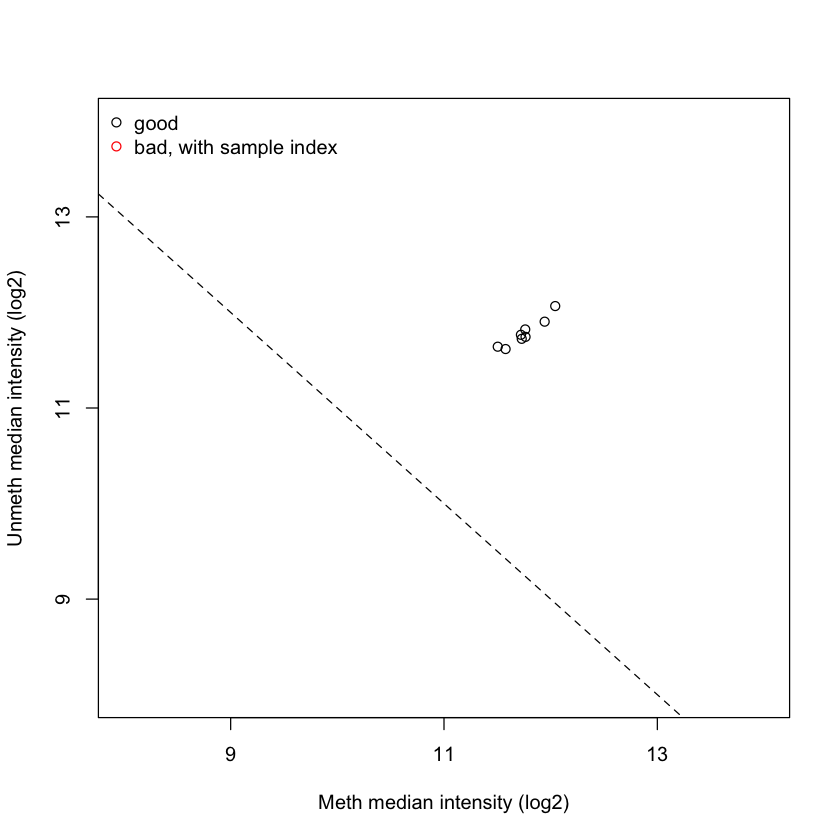

In [15]:
qc = getQC(MSet.raw) 
qc
plotQC(qc) # plotting QC

All eight samples are well above the threshold indicating high median fluorescence values. This shows that they are of good quality.


#### 5.2 Checking intensity of negative controls

For accessing the names and the numbers of the different types of **control probes** we can use the ```getProbeInfo``` function. 

Background fluorescence may arise due to spurious annealing or contamination. If the background signal was higher than the real signal, we can not distinguish the two. In this case the sample quality would be considered to be poor. By assesing the quality we may evaluate the performance across samples. 

Generally, the signal intensities of negative controls vary between 100 and 1000 units and higher values lead to poor DNA template quality. We can evaluate the signal intensities of negative controls by using the ``` controlStripPlot ```.

In [16]:
getProbeInfo(RGset, type = "Control")

DataFrame with 848 rows and 4 columns
        Address        Type       Color  ExtendedType
    <character> <character> <character>   <character>
1      27630314    STAINING         Red    DNP (High)
2      43603326    STAINING      Purple     DNP (Bkg)
3      41666334    STAINING       Green Biotin (High)
4      34648333    STAINING        Blue  Biotin (Bkg)
5      63642461   EXTENSION         Red Extension (A)
...         ...         ...         ...           ...
844    65622344      NORM_T      Purple      Norm_T59
845    57640346      NORM_C       Green      Norm_C60
846    47715450      NORM_T      Purple      Norm_T60
847    28673402      NORM_C       Green      Norm_C61
848    13742412      NORM_T      Purple      Norm_T61

In [17]:
df_TypeControl = data.frame(getProbeInfo(RGset, type = "Control"))
str(df_TypeControl)

'data.frame':	848 obs. of  4 variables:
 $ Address     : chr  "27630314" "43603326" "41666334" "34648333" ...
 $ Type        : chr  "STAINING" "STAINING" "STAINING" "STAINING" ...
 $ Color       : chr  "Red" "Purple" "Green" "Blue" ...
 $ ExtendedType: chr  "DNP (High)" "DNP (Bkg)" "Biotin (High)" "Biotin (Bkg)" ...


In [18]:
table(df_TypeControl$Type)


 BISULFITE CONVERSION I BISULFITE CONVERSION II               EXTENSION 
                     12                       4                       4 
          HYBRIDIZATION                NEGATIVE         NON-POLYMORPHIC 
                      3                     613                       4 
                 NORM_A                  NORM_C                  NORM_G 
                     32                      61                      32 
                 NORM_T             RESTORATION           SPECIFICITY I 
                     61                       1                      12 
         SPECIFICITY II                STAINING          TARGET REMOVAL 
                      3                       4                       2 

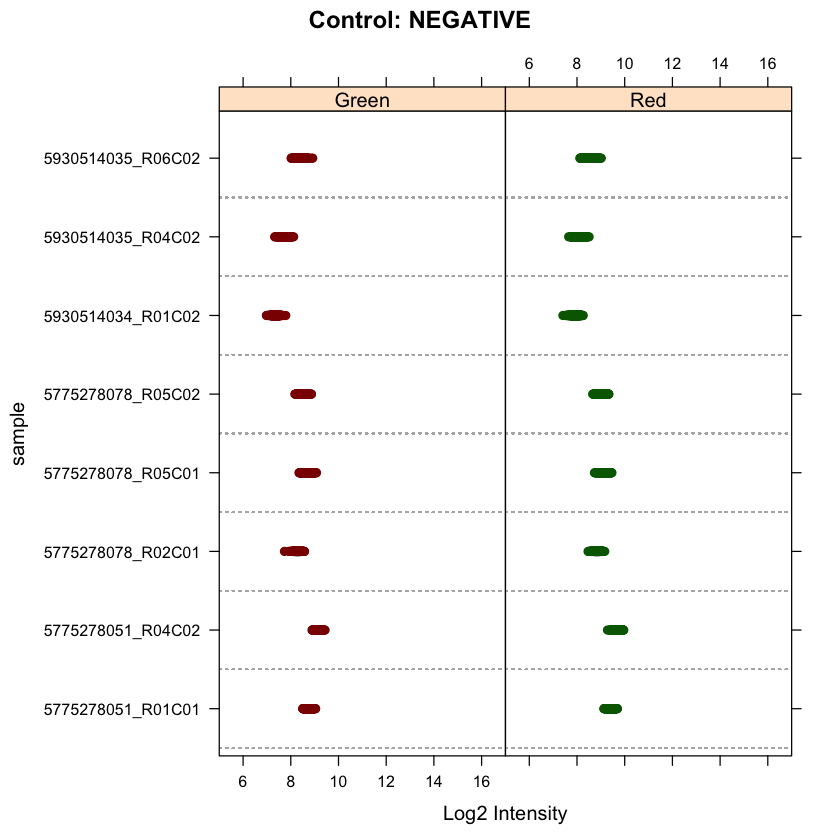

In [19]:
# Plotting the intensity values of the controls
controlStripPlot(RGset, controls="NEGATIVE")

All samples show a Log2 intensity below the threshold of 10.

$Log_2(1000)=10$

#### 5.3 Calculating detection *p-values* for *each* sample

Finding number of probes that have  a detection *p-value* - higher than 0,05.

The detection p-value indicates the likelyhood of the measured intensity being a true signal and not just a background noise. 

$H_0  =  background == real\ signal$

$H_A = background ≠ real\ signal$

If the *p-value* is below our $\alpha$ of 0.05 we may reject the $H_0$


For comparing the fluorescence of each with the background signal level can be done with the ```detectionP``` function.

In [20]:
# Calculating the detection pValues 
detP = detectionP(RGset) # fct to compare the fluorescence of each probe with the background signal
save(detP,file="detP.RData")
str(detP)
dim(detP) # to see that no probes are missing
summary(detP)

 num [1:485512, 1:8] 0.00 0.00 4.07e-113 0.00 0.00 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:485512] "cg00050873" "cg00212031" "cg00213748" "cg00214611" ...
  ..$ : chr [1:8] "5775278051_R01C01" "5775278051_R04C02" "5775278078_R02C01" "5775278078_R05C01" ...


[1] 485512      8

 5775278051_R01C01   5775278051_R04C02   5775278078_R02C01  
 Min.   :0.0000000   Min.   :0.0000000   Min.   :0.0000000  
 1st Qu.:0.0000000   1st Qu.:0.0000000   1st Qu.:0.0000000  
 Median :0.0000000   Median :0.0000000   Median :0.0000000  
 Mean   :0.0002306   Mean   :0.0001976   Mean   :0.0003054  
 3rd Qu.:0.0000000   3rd Qu.:0.0000000   3rd Qu.:0.0000000  
 Max.   :1.0000000   Max.   :1.0000000   Max.   :1.0000000  
 5775278078_R05C01   5775278078_R05C02  5930514034_R01C02  5930514035_R04C02 
 Min.   :0.0000000   Min.   :0.000000   Min.   :0.00e+00   Min.   :0.00e+00  
 1st Qu.:0.0000000   1st Qu.:0.000000   1st Qu.:0.00e+00   1st Qu.:0.00e+00  
 Median :0.0000000   Median :0.000000   Median :0.00e+00   Median :0.00e+00  
 Mean   :0.0005279   Mean   :0.000474   Mean   :8.16e-05   Mean   :5.71e-05  
 3rd Qu.:0.0000000   3rd Qu.:0.000000   3rd Qu.:0.00e+00   3rd Qu.:0.00e+00  
 Max.   :1.0000000   Max.   :1.000000   Max.   :1.00e+00   Max.   :1.00e+00  
 5930514035_R06C02 
 Min.  

To evaluate how many probes hav a *p-value* higher than the 0.05 detection p is filtereed out.

In [21]:
failed = detP>0.05
# Probes that show no statistically different signal compared to the negatives
# are labelled "failed" because their signal is similar to the background signal.

# Showing the data in booleans: TRUE/FALSE
summary(failed)


 5775278051_R01C01 5775278051_R04C02 5775278078_R02C01 5775278078_R05C01
 Mode :logical     Mode :logical     Mode :logical     Mode :logical    
 FALSE:485265      FALSE:485302      FALSE:485248      FALSE:485099     
 TRUE :247         TRUE :210         TRUE :264         TRUE :413        
 5775278078_R05C02 5930514034_R01C02 5930514035_R04C02 5930514035_R06C02
 Mode :logical     Mode :logical     Mode :logical     Mode :logical    
 FALSE:485127      FALSE:485421      FALSE:485466      FALSE:485397     
 TRUE :385         TRUE :91          TRUE :46          TRUE :115        

The data can be visualized more tidy in the following table.


|     Sample                ||     Failed positions    | 
|---------------------------||------------------|
|     5775278051_R01C01    ||     247         |
|     5775278051_R04C02    ||     210         |
|     5775278078_R02C01    ||     264         |
|     5775278078_R05C01    ||     413         |
|     5775278078_R05C02    ||     385         |
|     5930514034_R01C02    ||     91         | 
|     5930514035_R04C02    ||     46         | 
|     5930514035_R06C02    ||     115         | 

In [22]:
table(failed) # total of failed postions.

failed
  FALSE    TRUE 
3882325    1771 

# 6.
#### 6.1 Calculating the raw $\beta$ and M values

$\beta$ = $\frac{M}{M+U}$

It expressed the methylation level at a given CpG site and ranges between 0 (absences of methylation) and 1 (fully methylated).

$M=log_2(\frac{M}{U})$

The M value is the transformation of the $\beta$  value in the logarithmic distribution.


For retrieving $\beta$ and M values we have to separate the two groups of patients. By starting form the ```MSet.raw ``` file we can select only the "Group" column:

In [23]:
# start with the wild type (wt)
wt = SampleSheet[SampleSheet$Group=="WT", "Basename"]
wtSet = MSet.raw[,colnames(MSet.raw) %in% wt]
betaWT = getBeta(wtSet) # beta val of the WT set

M_wt = getM(wtSet)
meanBeta_wt = apply(betaWT, 1, mean, na.rm=T)
meanM_wt = apply(M_wt, 1, mean, na.rm=T)
d_meanBeta_wt = density(meanBeta_wt)
d_meanM_wt = density(meanM_wt)


In [24]:
summary(betaWT)

 5775278078_R02C01 5775278078_R05C01 5775278078_R05C02 5930514035_R06C02 
 Min.   :0.01128   Min.   :0.01133   Min.   :0.01178   Min.   :0.008389  
 1st Qu.:0.08523   1st Qu.:0.09360   1st Qu.:0.09452   1st Qu.:0.080286  
 Median :0.60102   Median :0.60714   Median :0.60643   Median :0.616594  
 Mean   :0.48459   Mean   :0.49043   Mean   :0.49042   Mean   :0.494334  
 3rd Qu.:0.81373   3rd Qu.:0.81985   3rd Qu.:0.81816   3rd Qu.:0.843440  
 Max.   :1.00000   Max.   :0.98884   Max.   :0.98877   Max.   :1.000000  
 NA's   :3         NA's   :1         NA's   :1         NA's   :4         

In [25]:
# for down sydrome DS
ds = SampleSheet[SampleSheet$Group=="DS", "Basename"]
dsSet = MSet.raw[,colnames(MSet.raw) %in% ds]

betaDS = getBeta(dsSet) # beta val of the DS set
M_ds = getM(dsSet)
meanBeta_ds = apply(betaDS, 1, mean, na.rm=T)
meanM_ds = apply(M_ds, 1, mean, na.rm=T)
d_meanBeta_ds = density(meanBeta_ds)
d_meanM_ds = density(meanM_ds)

In [26]:
summary(betaDS)

 5775278051_R01C01 5775278051_R04C02 5930514034_R01C02 5930514035_R04C02
 Min.   :0.01745   Min.   :0.01828   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.09198   1st Qu.:0.09763   1st Qu.:0.06721   1st Qu.:0.07456  
 Median :0.60089   Median :0.60543   Median :0.58693   Median :0.61593  
 Mean   :0.47988   Mean   :0.48371   Mean   :0.47988   Mean   :0.49289  
 3rd Qu.:0.79643   3rd Qu.:0.80112   3rd Qu.:0.82893   3rd Qu.:0.84495  
 Max.   :1.00000   Max.   :0.98415   Max.   :1.00000   Max.   :1.00000  
 NA's   :1         NA's   :2         NA's   :10        NA's   :7        

#### 6.2 Plotting the densities of mean methylation values by dividing the samples in DS and WT



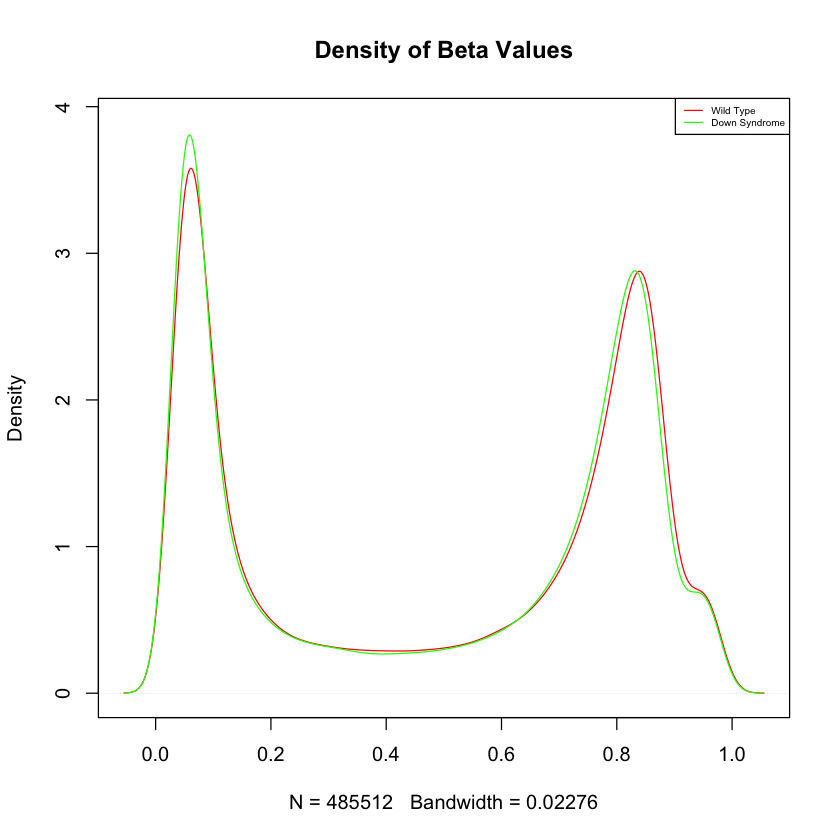

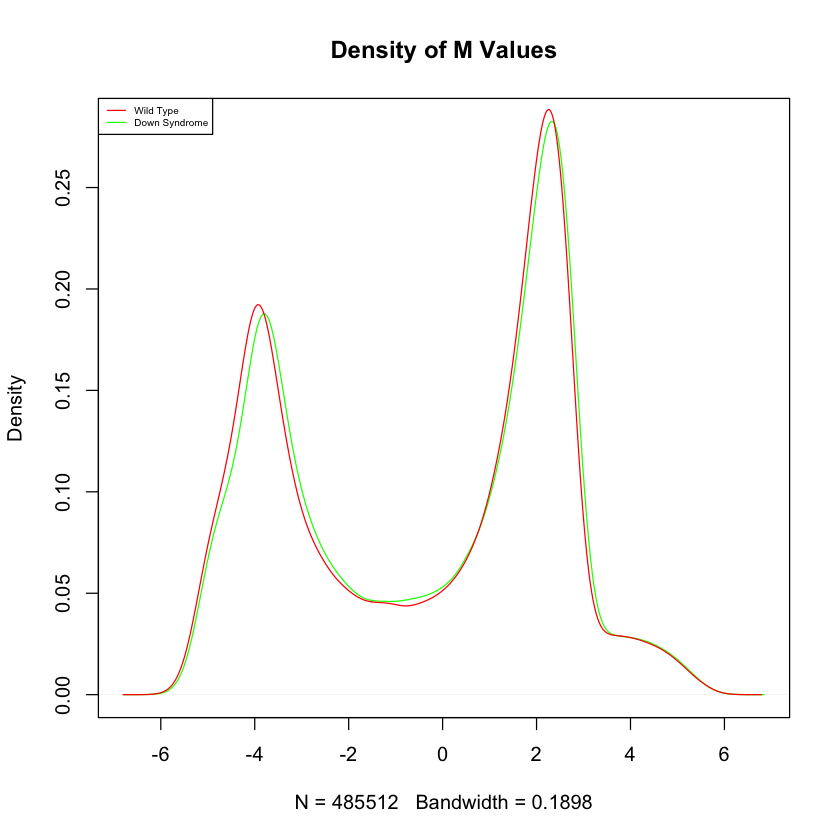

In [27]:
par(mfrow=c(1,1))
plot(d_meanBeta_wt,main="Density of Beta Values",col="red", ylim = c(-0.01, 3.9))
lines(d_meanBeta_ds, col="green")
legend("topright", legend=c("Wild Type", "Down Syndrome"),
       col=c("red", "green"), lty=1:1, cex=0.5)
plot(d_meanM_wt,main="Density of M Values",col="green")
lines(d_meanM_ds, col="red")
legend("topleft", legend=c("Wild Type", "Down Syndrome"),
       col=c("red", "green"), lty=1:1, cex=0.5)

The plots show that the two sets have a similar distribution but the peak of the Down Syndrome graph is slightly higher in the graph showing the density of the $\beta$ values.

# 7. Normailizing the data

This is done using the ```preprocessNoob``` function. Noob stands for normal-exponential out-of-band. Then the raw data is compared to the normalized data.

* plot with 5 panels:
    - showing for both raw and normalized data:
        - plotting density of $\beta$  mean values according to the chemistry of the probes.
        - plotting density of $\beta$ standard deviation values according to: 
            - the chemistry of the probes 
            - boxplot of beta values


In general IlluminaBeadChip utilizes two types of chemistry: 
1. Type I:
* uses two beads per CpG site - one for methylated and one for the unmetylated.

2. Type II:
* uses only one probe and one bead per CpG
* to distinguish between methylated and un methulated it uses ghe colors red and green.

The raw methylation level at each CpG site is quantified by using the $\beta$-value which shows a bimodal distribution.

Normalization makes the data comparable.

In [28]:
# Extracting the two types from Illumina450Manifest_clean

df_I = Illumina450Manifest_clean[Illumina450Manifest_clean$Infinium_Design_Type=="I",]
df_I = droplevels(df_I)

df_II = Illumina450Manifest_clean[Illumina450Manifest_clean$Infinium_Design_Type=="II",]
df_II = droplevels(df_II)

# Calculating Beta value for the whole Mset.raw 
# to be able to extract the beta values via the IlluminaID later on.

beta = getBeta(MSet.raw)
beta_I = beta[rownames(beta) %in% df_I$IlmnID,]
beta_II = beta[rownames(beta) %in% df_II$IlmnID,]

#appling the mean function like in the Step 6.

mean_of_beta_I = apply(beta_I,1,mean)
mean_of_beta_II = apply(beta_II,1,mean)

In [29]:
#applying the desity function for both types and taking into account the missing data option.

d_mean_of_beta_I = density(mean_of_beta_I,na.rm=T)
d_mean_of_beta_II = density(mean_of_beta_II,na.rm=T)

In [30]:
#standard deviation of beta value of the raw data: using the function sd.
# na.rm to remove  missing data before calculating the standard deviation.

sd_of_beta_I = apply(beta_I,1,sd,na.rm=T)
sd_of_beta_II = apply(beta_II,1,sd,na.rm=T)

In [38]:
# installing  required package:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("IlluminaHumanMethylation450kanno.ilmn12.hg19")

Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.2 (2020-06-22)

Installing package(s) 'IlluminaHumanMethylation450kanno.ilmn12.hg19'

installing the source package ‘IlluminaHumanMethylation450kanno.ilmn12.hg19’


Old packages: 'DelayedMatrixStats', 'Rcpp', 'XML', 'gplots', 'rhdf5'



In [31]:
# density function for simplification

d_sd_of_beta_I = density(sd_of_beta_I,)
d_sd_of_beta_II = density(sd_of_beta_II)

# Normalisation on the fluorescences to obtain the normalised parameters (same as before)
# I will use is the Noob (normal-exponential out-of-band) for normalization
# it is a background correction created to normalise the dyes in Illumina Methylation arrays.

preprocessNoob_results = preprocessNoob(RGset)

#At this point data are normalised and I can extract the Beta value

beta_preprocessNoob = getBeta(preprocessNoob_results)

Loading required package: IlluminaHumanMethylation450kanno.ilmn12.hg19



In [32]:
#From the object containing all the beta values 

beta_preprocessNoob_I = beta_preprocessNoob[rownames(beta_preprocessNoob) %in% df_I$IlmnID,]
beta_preprocessNoob_II = beta_preprocessNoob[rownames(beta_preprocessNoob) %in% df_II$IlmnID,]

# calculating the mean

mean_of_beta_preprocessNoob_I = apply(beta_preprocessNoob_I,1,mean)
mean_of_beta_preprocessNoob_II = apply(beta_preprocessNoob_II,1,mean)

# computing density of mean Beta value

d_mean_of_beta_preprocessNoob_I = density(mean_of_beta_preprocessNoob_I,na.rm=T)
d_mean_of_beta_preprocessNoob_II = density(mean_of_beta_preprocessNoob_II,na.rm=T)

# computing standard deviation of Beta value:
# computing the standard deviation using apply function

sd_of_beta_preprocessNoob_I = apply(beta_preprocessNoob_I,1,sd)
sd_of_beta_preprocessNoob_II = apply(beta_preprocessNoob_II,1,sd)

# density function

d_sd_of_beta_preprocessNoob_I = density(sd_of_beta_preprocessNoob_I,na.rm=T)
d_sd_of_beta_preprocessNoob_II = density(sd_of_beta_preprocessNoob_II,na.rm=T)

#### Plotting the data

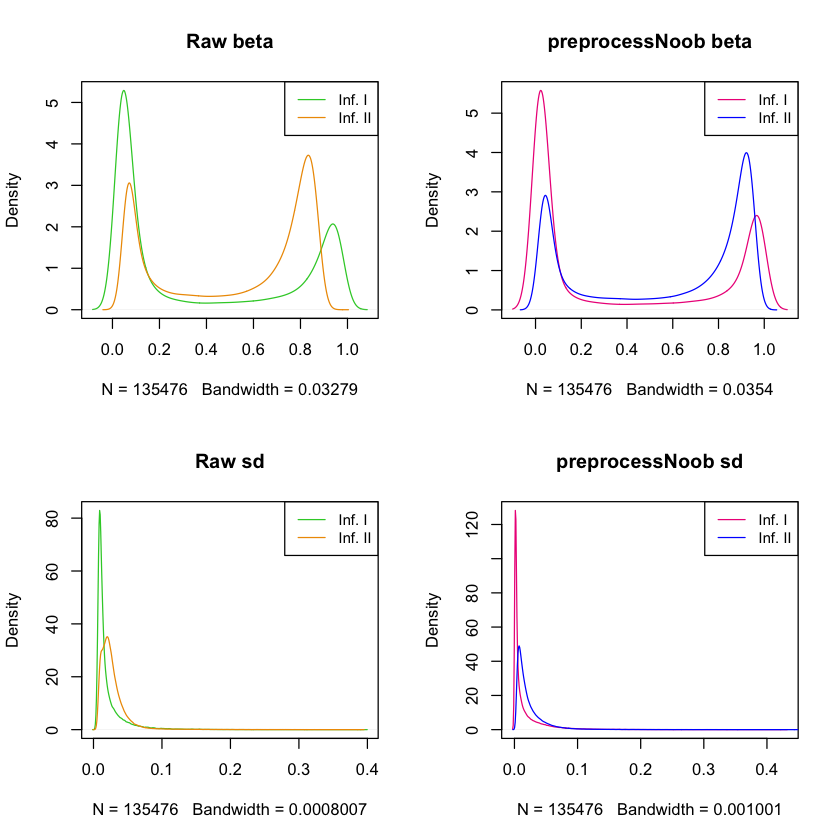

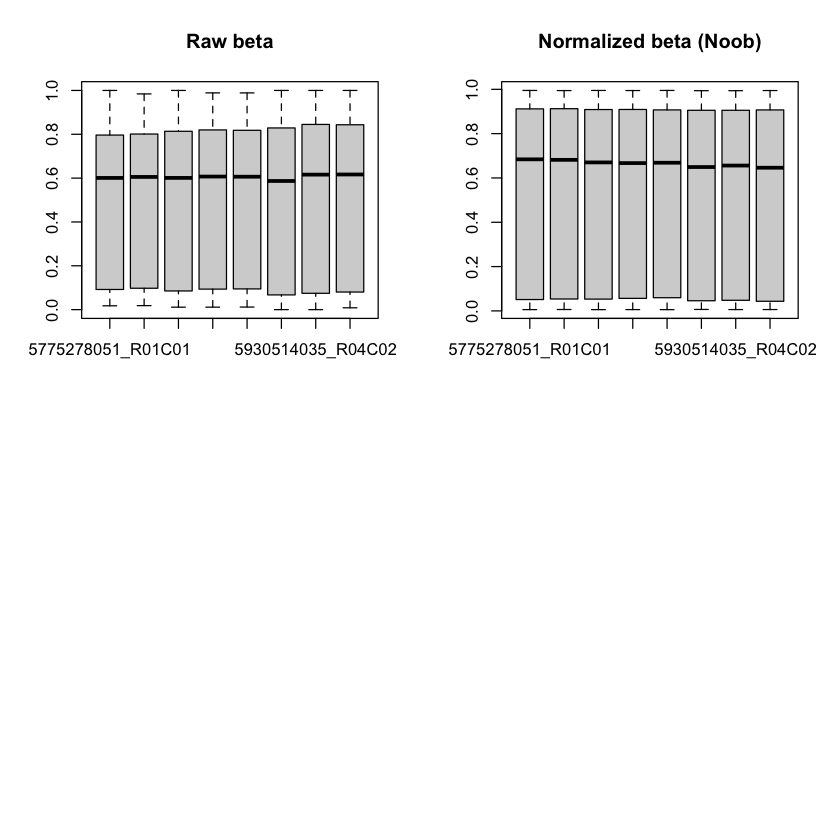

In [33]:
par(mfrow=c(2,2))

# raw mean beta
plot(d_mean_of_beta_I,col="limegreen",main="Raw beta")
lines(d_mean_of_beta_II,col="orange2")
legend("topright", legend=c("Inf. I", "Inf. II"),
       col=c("limegreen", "orange2"), lty=1:1, cex=0.9)

# normalized mean beta
plot(d_mean_of_beta_preprocessNoob_I,col="deeppink2",main="preprocessNoob beta")
lines(d_mean_of_beta_preprocessNoob_II,col="blue")
legend("topright", legend=c("Inf. I", "Inf. II"),
       col=c("deeppink2", "blue"), lty=1:1, cex=0.9)

# raw sd beta
plot(d_sd_of_beta_I,col="limegreen",main="Raw sd")
lines(d_sd_of_beta_II,col="orange2")
legend("topright", legend=c("Inf. I", "Inf. II"),
       col=c("limegreen", "orange2"), lty=1:1, cex=0.9)

# normalized sd beta
plot(d_sd_of_beta_preprocessNoob_I,col="deeppink2",main="preprocessNoob sd")
lines(d_sd_of_beta_preprocessNoob_II,col="blue")
legend("topright", legend=c("Inf. I", "Inf. II"),
       col=c("deeppink2", "blue"), lty=1:1, cex=0.9)

# raw beta
boxplot(beta, main='Raw beta')
# normailzed beta
boxplot(beta_preprocessNoob, main="Normalized beta (Noob)")


#### Comments on the plots
For each line we can compare the first plot depicting the raw data with the second one depicting the normalized data (from left to right).

Top left shows the raw $\beta$ value, while top right shows the $\beta$ value that has been normalized using the normal-exponential out-of-band (Noob) function. For Infinium I we can see that the peaks are more narrow in the nomalized plot. Infinium II, in addition was shifted slightly to the right in the normalized plot.

In the second line, the left graph shows the raw standard mediation, while the right graph shows the same data but normalized with the Noob function. For both Infinium I and II the normalized peaks were higher and more narrow.

The left boxplot shows the raw $\beta$ values, while the right one shows the normalized ones. We can see that the raw data has more variance compared to the normalized data. Normalization lead to a much more uniform distribution. We may observe the largest change in the lenght of the whiskers. These are more uniform and also shorter, than in the raw set.

# 8.
#### Performing Principal Component Analysis on the $\beta$ Matrix Genereated in Step 7.


Micorarray analysis produces a lot of data since it is investigating many genes and many samples. Principal components analysis (PCA) projects high-dimensional space data into lower-dimensional space. It helps us to identify trends and variance components thus we may identify predominant gene expression patterns. Its also aiding in identifying outliers and batch effects. 

We will use the ```prcomp()``` function. It takes as an argument the matrix of the nomralized $\beta$ values. The *screeplot* is subsequently obtained with the ```fvis_eig()``` function. This plot showes the consistently decending varaiance.

In [34]:
pca_results = prcomp(t(beta_preprocessNoob),scale=T)
print(summary(pca_results))

Importance of components:
                            PC1      PC2      PC3      PC4      PC5      PC6
Standard deviation     366.9306 288.8646 249.8997 232.2361 229.1879 223.5656
Proportion of Variance   0.2773   0.1719   0.1286   0.1111   0.1082   0.1029
Cumulative Proportion    0.2773   0.4492   0.5778   0.6889   0.7971   0.9000
                             PC7       PC8
Standard deviation     220.31567 4.647e-12
Proportion of Variance   0.09997 0.000e+00
Cumulative Proportion    1.00000 1.000e+00


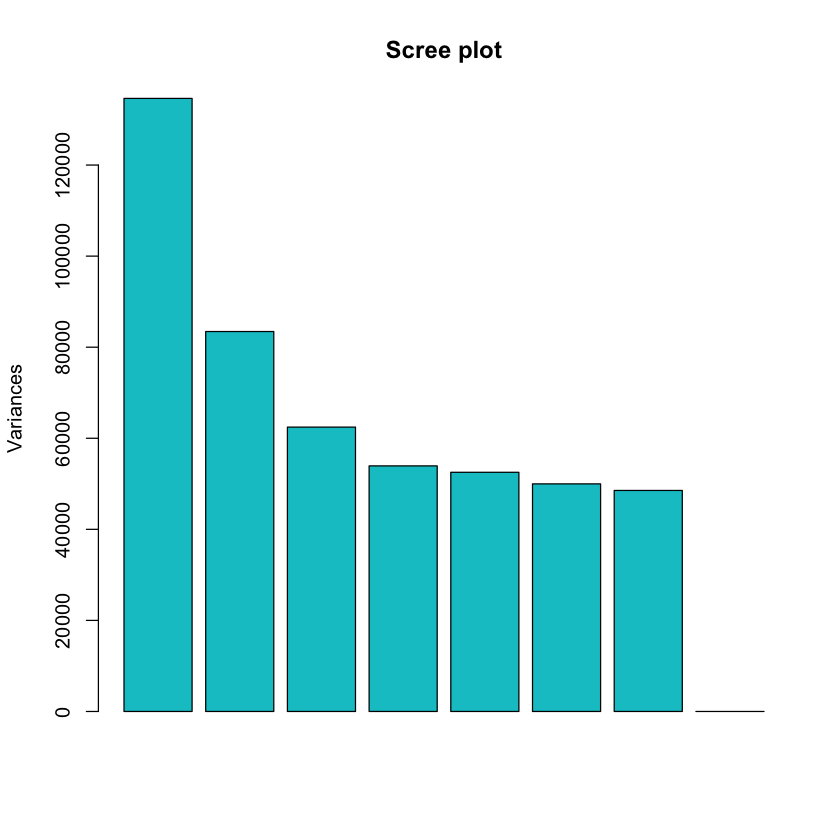

In [35]:
# plotting 
plot(pca_results, col="turquoise3",main="Scree plot")

visualizing the distribution of samples by most relevant principal components.

In [36]:
#visualizing the distribution of samples by most relevant principal components.
SampleSheet$Group = as.factor(SampleSheet$Group) # changeing the Group columns into factor (to be sure)

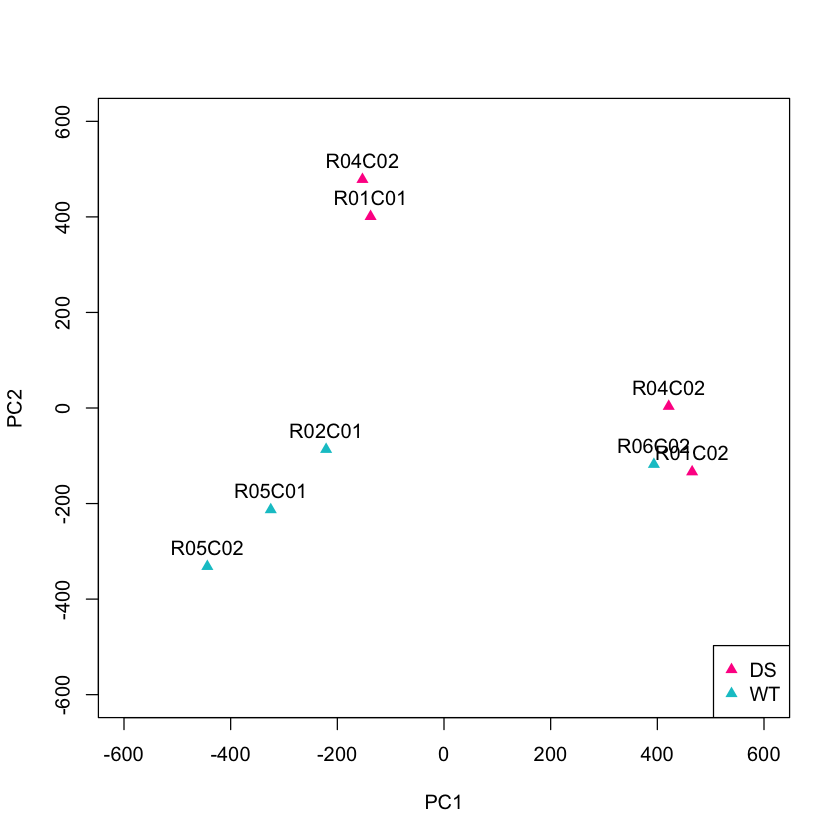

In [37]:
pheno = read.csv("./input_d/Samplesheet_report_2020.csv",header=T, stringsAsFactors=T)
palette(c("deeppink1","turquoise3")) # assigning phenotypes to colours
plot(pca_results$x[,1], pca_results$x[,2],cex=1,pch=17,col=pheno$Group,xlab="PC1",ylab="PC2",xlim=c(-600,600),ylim=c(-600,600))
text(pca_results$x[,1], pca_results$x[,2],labels=pheno$Array,cex=1.0,pos=3)
legend("bottomright",legend=levels(pheno$Group),col=c(1:nlevels(pheno$Group)),pch=17)


In [104]:
# group = factor(targets$Group)
# palette(c("deeppink1","turquoise3"))
# plot(pca_results$x[,1], pca_results$x[,2],cex=2,pch=19, col=c(group),xlab="PC1",ylab="PC2", ,xlim=c(-600,600),ylim=c(-600,600))
# text(pca_results$x[,1], pca_results$x[,2],labels=rownames(pca_results$x),cex=0.9,pos=3)
# legend("bottomright",legend=levels(pheno$Group),col=c(1:nlevels(pheno$Group)),pch=17)


Comment: 

The plot we can see that WT samples are clustering distant from DS samples with the exception of **R06C01**. The two groups can be separated by a diagonal line, even though it is very close to **R06C01**.



# 9.
#### Identifying differentially methylated probes between WT and DS by using the matrix of normalized $\beta$ values.

We will do this using the **Student's T-test** it is a statistical hypothesis test in which the test statistic followes a Student's *t-* distribution under the $H_0$. Thus, it is a parametric test comparing a single variable in two groups. The aim is to highlight the difference in methylation levels between WT and DS.

In [38]:
# defining the function
t_test_f = function(x){
    t_test = t.test(x~pheno$Group)
    return(t_test$p.value)
}

Applying the function to the entire set of methylation levels obtained by normalization

In [39]:
p_values_ttest = apply(beta_preprocessNoob,1,t_test_f)

Creating a data frame containing:
* methylation values described by $\beta$ value 
* corresponding p-values.

In [40]:
save(p_values_ttest,file="p_values_ttest.RData")

In [41]:
length(p_values_ttest)

[1] 485512

In [42]:
final_ttest = data.frame(beta_preprocessNoob, p_values_ttest)
save(final_ttest,file="final_ttest.RData")
#ordering
ordered_ttest = final_ttest[order(final_ttest$p_values_ttest),]
save(ordered_ttest,file="ordered_ttest.RData")

In [43]:
dim(ordered_ttest) #checking that all lines and cols are present

[1] 485512      9

Selecting only probes that have a p-value that is lower than our $\alpha$ of 0.05. We access the number using ```dim()```

In [44]:
ttest_0.05 = ordered_ttest[ordered_ttest$p_values_ttest<=0.05,]
dim(ttest_0.05)

[1] 35396     9

The resluts show that out of 485512 probes 35396 display a methylation level above our significance threashold ( $\alpha$ = 0.05). 


# 10.
#### Adjusting for Multiple Testing using the Bonferroni Correction
In this analysis we are however not taking into consideration that the **same** test is done **multiple times**. To account for multiple testin the threshold must be **adjusted** with the use of correction methods. That way we can avoid rejecting a true $H_0$ (type I error).

In [46]:
str(ordered_ttest)
raw_p_values = ordered_ttest[,9] # selecting col that contains the pval

'data.frame':	485512 obs. of  9 variables:
 $ X5775278051_R01C01: num  0.849 0.486 0.782 0.845 0.939 ...
 $ X5775278051_R04C02: num  0.853 0.483 0.79 0.839 0.939 ...
 $ X5775278078_R02C01: num  0.577 0.592 0.923 0.566 0.324 ...
 $ X5775278078_R05C01: num  0.571 0.584 0.92 0.586 0.346 ...
 $ X5775278078_R05C02: num  0.564 0.594 0.929 0.607 0.309 ...
 $ X5930514034_R01C02: num  0.862 0.478 0.782 0.875 0.929 ...
 $ X5930514035_R04C02: num  0.849 0.471 0.801 0.873 0.928 ...
 $ X5930514035_R06C02: num  0.585 0.601 0.91 0.573 0.305 ...
 $ p_values_ttest    : num  2.24e-08 4.60e-07 5.52e-07 7.15e-07 1.11e-06 ...


#### Bonferroni Correction

In [49]:
corr_p_v_Bonferroni = p.adjust(raw_p_values,"bonferroni") 
save(corr_p_v_Bonferroni,file="corr_p_v_Bonferroni.RData")

####  Benjamini–Hochberg Correction

In [50]:
cor_p_v_Benj_Hoch = p.adjust(raw_p_values,"BH")
save(cor_p_v_Benj_Hoch,file="cor_p_v_Benj_Hoch.RData")

Now I can add the corrected values of the Bonferroni and the Benjamini–Hochberg Correction to my dataframe:

In [51]:
ttest_corrections = data.frame(ordered_ttest, corr_p_v_Bonferroni, cor_p_v_Benj_Hoch) # making new df holding B and BH
head(ttest_corrections) # to see if it worked scroll to col 10 and 11
str(ttest_corrections) # data frame contains now  pval - corr_p_v_Bonferroni and cor_p_v_Benj_Hoch
save(ttest_corrections,file="ttest_corrections.RData")

,X5775278051_R01C01,X5775278051_R04C02,X5775278078_R02C01,X5775278078_R05C01,X5775278078_R05C02,X5930514034_R01C02,X5930514035_R04C02,X5930514035_R06C02,p_values_ttest,corr_p_v_Bonferroni,cor_p_v_Benj_Hoch
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cg23793686,0.8490996,0.8528547,0.5770209,0.5709095,0.5644022,0.8616751,0.8491520,0.5849580,2.239676e-08,0.0108739,0.01087390
cg01687862,0.4855201,0.4827877,0.5917069,0.5838733,0.5938825,0.4779860,0.4706187,0.6014571,4.599382e-07,0.2233055,0.08470674
cg22101174,0.7822477,0.7896210,0.9234543,0.9196530,0.9285108,0.7824866,0.8006374,0.9097723,5.516405e-07,0.2678281,0.08470674
cg26269677,0.8451549,0.8392534,0.5655901,0.5855142,0.6066935,0.8751851,0.8730835,0.5725161,7.153804e-07,0.3473257,0.08470674
cg12012426,0.9390097,0.9390102,0.3237495,0.3457892,0.3094842,0.9289307,0.9283990,0.3053947,1.112311e-06,0.5400404,0.08470674
cg05215830,0.3938123,0.3773618,0.7220294,0.7205052,0.7292675,0.3816070,0.4235649,0.7743513,1.195589e-06,0.5804727,0.08470674


'data.frame':	485512 obs. of  11 variables:
 $ X5775278051_R01C01 : num  0.849 0.486 0.782 0.845 0.939 ...
 $ X5775278051_R04C02 : num  0.853 0.483 0.79 0.839 0.939 ...
 $ X5775278078_R02C01 : num  0.577 0.592 0.923 0.566 0.324 ...
 $ X5775278078_R05C01 : num  0.571 0.584 0.92 0.586 0.346 ...
 $ X5775278078_R05C02 : num  0.564 0.594 0.929 0.607 0.309 ...
 $ X5930514034_R01C02 : num  0.862 0.478 0.782 0.875 0.929 ...
 $ X5930514035_R04C02 : num  0.849 0.471 0.801 0.873 0.928 ...
 $ X5930514035_R06C02 : num  0.585 0.601 0.91 0.573 0.305 ...
 $ p_values_ttest     : num  2.24e-08 4.60e-07 5.52e-07 7.15e-07 1.11e-06 ...
 $ corr_p_v_Bonferroni: num  0.0109 0.2233 0.2678 0.3473 0.54 ...
 $ cor_p_v_Benj_Hoch  : num  0.0109 0.0847 0.0847 0.0847 0.0847 ...


In [157]:
ordered_Bonf = ttest_corrections[order(ttest_corrections$corr_p_v_Bonferroni),]
dim(ordered_Bonf) # checking that the dimensions are right


[1] 485512     11

In [162]:
Bonf_0.05 = ttest_corrections[ttest_corrections$corr_p_v_Bonferroni<=0.05,]
dim(Bonf_0.05)

[1]  1 11

In [163]:
Benj_Hoch_0.05 = ttest_corrections[ttest_corrections$cor_p_v_Benj_Hoch<=0.05,]
dim(Benj_Hoch_0.05)

[1]  1 11

After correcting both methods (Bonferroni and Benjamini Hochberg) only returned 1 that was above the $\alpha$ level of 0.05.

For visualizing the distribution of the different p values (raw, Bonferroni and Benjamini Hochberg) we created a box plot for each of them.

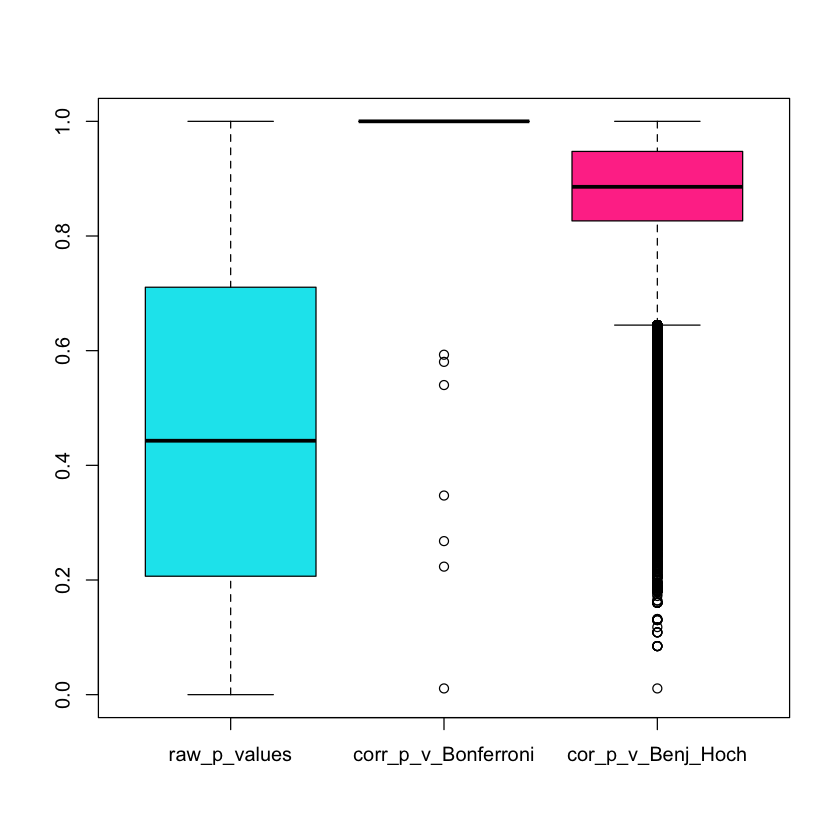

In [185]:
all_ttests_df = data.frame(raw_p_values, corr_p_v_Bonferroni, cor_p_v_Benj_Hoch) 
boxplot(all_ttests_df,  ylim = c(0.0, 1.0), col = c("turquoise2", "orange", "violetred1"))


| Type of correction | Samples obtained at $\alpha$ = 0.05 |
|---|---|
| None: raw  | 35396 |
| Bonferroni | 1 |
| Benjamini-Hochberg | 1 |

Both box plot and table above clearly visulaize the importance of corrections given  the stark difference in raw vs. corrected data. The distribution of the p-values corrected with the Benjamini-Hochberg method show a high number of outliers, while the Bonferroni boxplot is too small for the scale of the other two plots.

# 11.
#### Producing a Heatmap of the Top 100 Differentially Mehtylated Probes 

Heatmaps are useful for visulaizing  methylation levels of our samples in a matrix which uses different colours to represent different levels of methylation. It also performs hierarchical clustering thus, genes or samples of similar profiles are linked.
For this we need the ```gplots library``` which was loaded in line 2 at the beginning of this notebook. For this analysis we load the first 100 genes for comparisson.

In [197]:
summary(all_ttests_df)

  raw_p_values    corr_p_v_Bonferroni cor_p_v_Benj_Hoch
 Min.   :0.0000   Min.   :0.01087     Min.   :0.01087  
 1st Qu.:0.2066   1st Qu.:1.00000     1st Qu.:0.82635  
 Median :0.4429   Median :1.00000     Median :0.88579  
 Mean   :0.4622   Mean   :0.99999     Mean   :0.86703  
 3rd Qu.:0.7107   3rd Qu.:1.00000     3rd Qu.:0.94754  
 Max.   :1.0000   Max.   :1.00000     Max.   :1.00000  

In [198]:
input_heatmap=as.matrix(ttest_corrections[1:100,1:8])


Assigning *different colors* to each phenotype:

In [199]:
pheno$Group
colorbar = c("turquoise2","turquoise2","violetred1","violetred1",
             "violetred1","turquoise2","turquoise2","violetred1")


[1] DS DS WT WT WT DS DS WT
Levels: DS WT

#### Complete Linkage
- the default setting

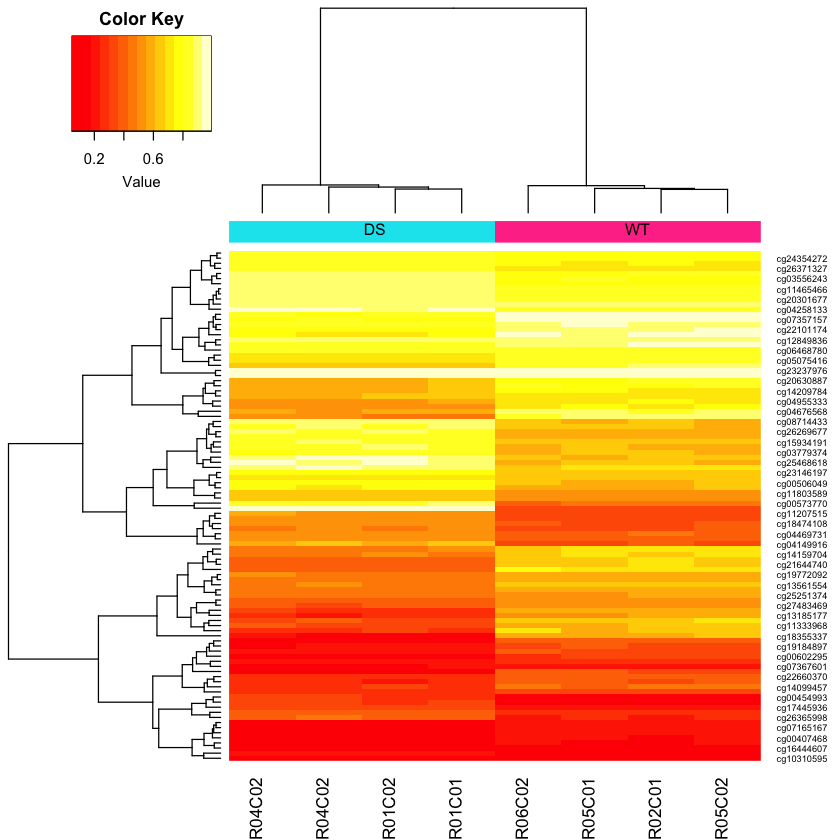

In [219]:
heatmap.2(input_heatmap,col="heat.colors",Rowv=T,Colv=T,
          dendrogram="both",key=T,ColSideColors=colorbar,
          density.info="none",trace="none",scale="none",symm=F)
text(x = c(0.4, 0.78), y = 0.79,
     labels = c('DS', 'WT'),
     col = 'black',
     cex = 0.8,
     las = 2,
     xpd = TRUE)

#### Single Linkage

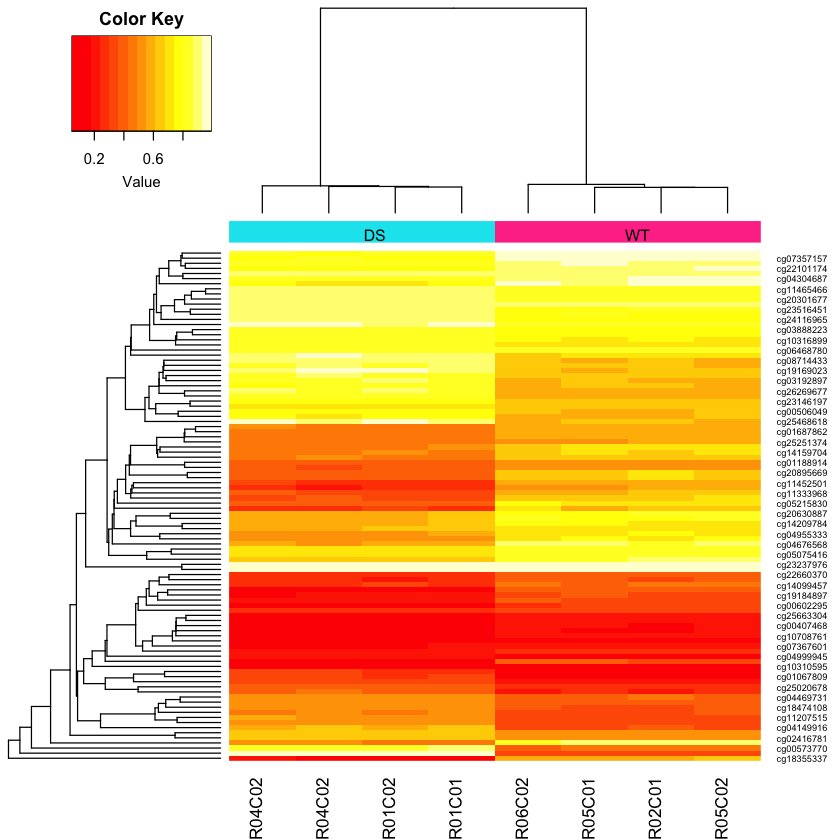

In [221]:
heatmap.2(input_heatmap,col="heat.colors",Rowv=T,Colv=T,
          hclustfun = function(x) hclust(x,method = 'single'),
          dendrogram="both",key=T,ColSideColors=colorbar,
          density.info="none",trace="none",scale="none",symm=F)
text(x = c(0.4, 0.78), y = 0.78,
     labels = c('DS', 'WT'),
     col = 'black',
     cex = 0.8,
     las = 2,
     xpd = TRUE)

#### Average Linkage

Hierarchical cluster analysis using **average distance metrics** specified in the ```hclustfun``` option:

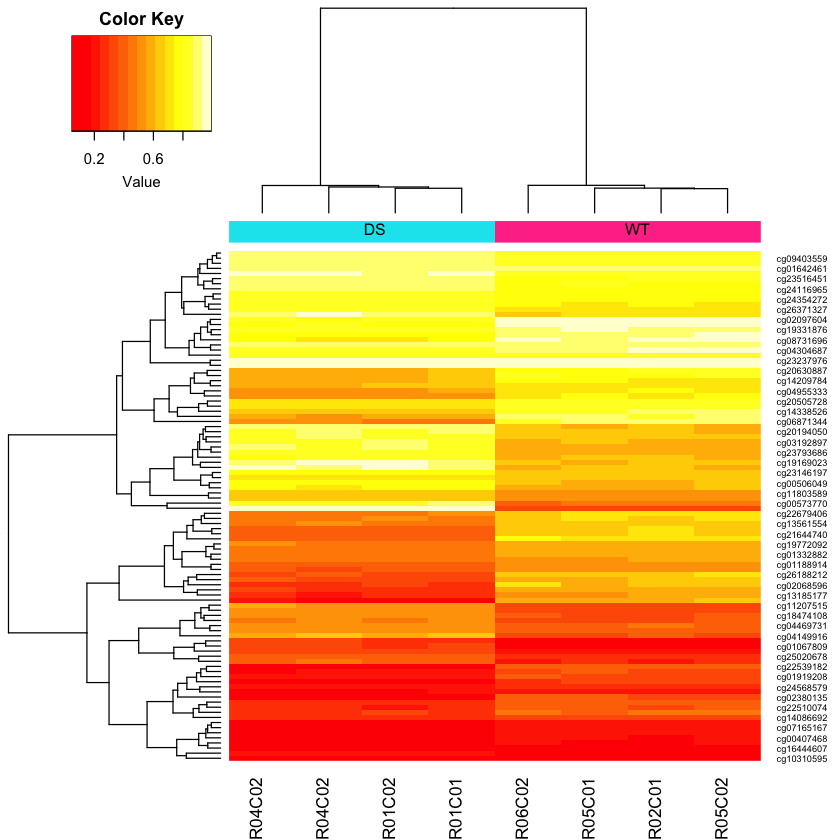

In [222]:

heatmap.2(input_heatmap,col="heat.colors",Rowv=T,Colv=T,
          hclustfun = function(x)hclust(x,method = 'average'),
          dendrogram="both",key=T,ColSideColors=colorbar,
          density.info="none",trace="none",scale="none",symm=F)
text(x = c(0.4, 0.78), y = 0.79,
     labels = c('DS', 'WT'),
     col = 'black',
     cex = 0.8,
     las = 2,
     xpd = TRUE)

# 12.1 
### Volcano Plot


A volcano plot shows the statistical significance plotted against the fold change. The fold change is calculated as the difference between the average $\beta$ values of wild type and Down syndrome samples

In [227]:
beta = ttest_corrections[,1:8]

beta_groupDS = beta[,pheno$Group=="DS"]
mean_beta_groupDS = apply(beta_groupDS,1,mean)

beta_groupWT = beta[,pheno$Group=="WT"]
mean_beta_groupWT = apply(beta_groupWT,1,mean)


Calculating difference between the two mean values:

In [229]:
delta = mean_beta_groupWT-mean_beta_groupDS

In [234]:
str(ttest_corrections) # to remember my column names and use them in the right plot

'data.frame':	485512 obs. of  11 variables:
 $ X5775278051_R01C01 : num  0.849 0.486 0.782 0.845 0.939 ...
 $ X5775278051_R04C02 : num  0.853 0.483 0.79 0.839 0.939 ...
 $ X5775278078_R02C01 : num  0.577 0.592 0.923 0.566 0.324 ...
 $ X5775278078_R05C01 : num  0.571 0.584 0.92 0.586 0.346 ...
 $ X5775278078_R05C02 : num  0.564 0.594 0.929 0.607 0.309 ...
 $ X5930514034_R01C02 : num  0.862 0.478 0.782 0.875 0.929 ...
 $ X5930514035_R04C02 : num  0.849 0.471 0.801 0.873 0.928 ...
 $ X5930514035_R06C02 : num  0.585 0.601 0.91 0.573 0.305 ...
 $ p_values_ttest     : num  2.24e-08 4.60e-07 5.52e-07 7.15e-07 1.11e-06 ...
 $ corr_p_v_Bonferroni: num  0.0109 0.2233 0.2678 0.3473 0.54 ...
 $ cor_p_v_Benj_Hoch  : num  0.0109 0.0847 0.0847 0.0847 0.0847 ...



- Creating a dataframe for each plot where delta values of VolcInput are stored; (Line 2, 12 and 22).
- Then we are highlighting the ones that have an absolute delta < 0.1 in a different color (lines 5, 13, 23). 
- And we add a line representing the assigned p-value of 0.05 to each plot (lines 8, 18, 28)

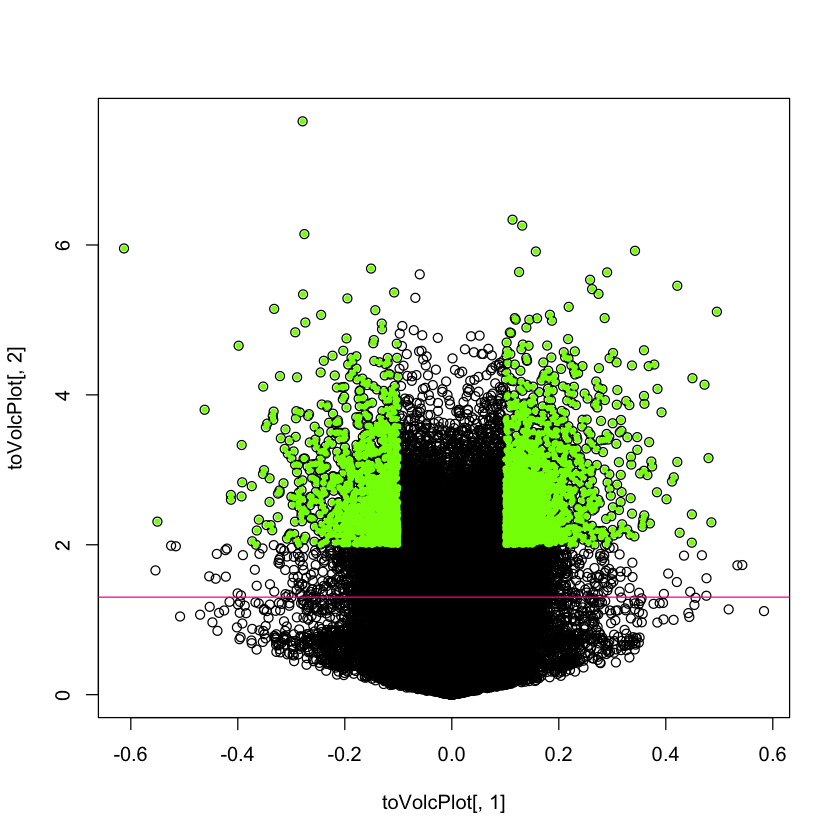

numeric(0)

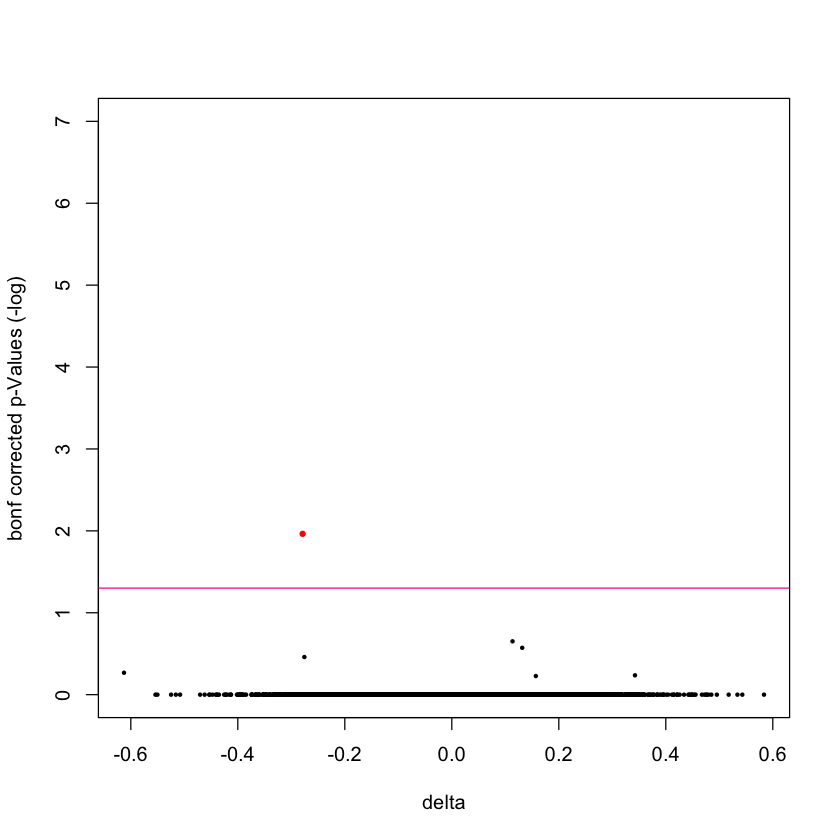

numeric(0)

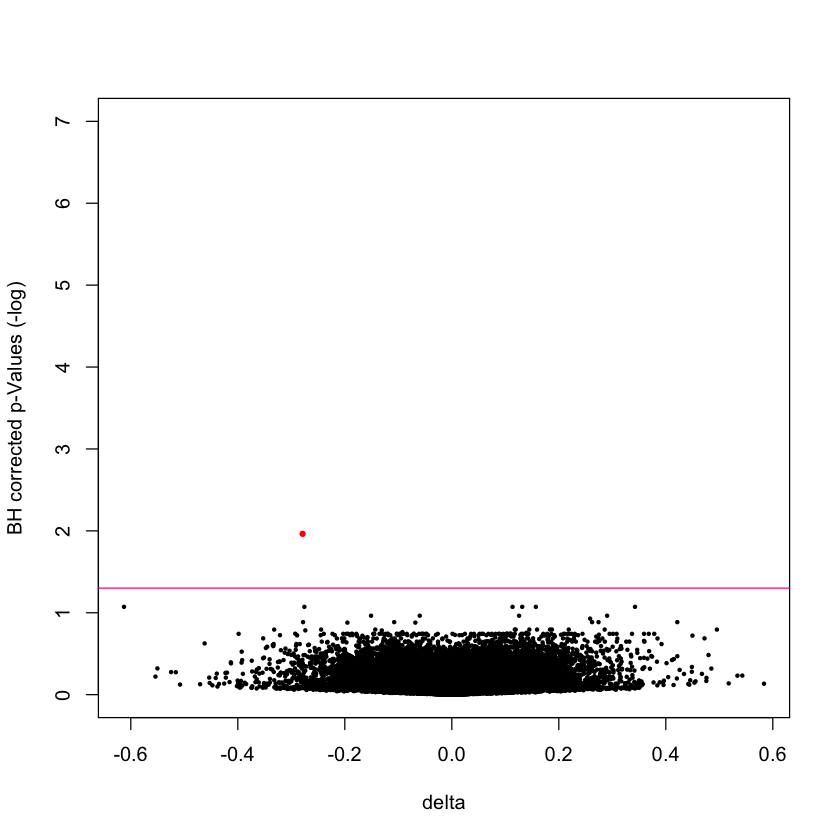

In [244]:
# Volcano plot raw data
toVolcPlot = data.frame(delta, -log10(ttest_corrections$p_values_ttest)) # Creating a dataframe where delta values of VolcInput are stored;
# head(toVolcPlot) # to see its ok
plot(toVolcPlot[,1], toVolcPlot[,2])
toHighlight = toVolcPlot[abs(toVolcPlot[,1])>0.1 & toVolcPlot[,2]>(-log10(0.01)),]
points(toHighlight[,1], toHighlight[,2],pch=16,cex=0.7,col="chartreuse1")
# To help visusalize whats below the assigned p value of  0.05 
abline(a=-log10(0.05),b=0,col="deeppink")


# Volcano plot with Bonferroni corrected data
VolcPlot_bonf = data.frame(delta, -log10(ttest_corrections$corr_p_v_Bonferroni))
Highlight_bonf = VolcPlot_bonf[abs(VolcPlot_bonf[, 1])>0.1 & VolcPlot_bonf[, 2]>(-log10(0.05)),]

# plot 
plot(VolcPlot_bonf[,1], VolcPlot_bonf[,2], pch=16,cex=0.5, ylab="bonf corrected p-Values (-log)", xlab="delta", ylim = c(0, 7)) -log10(0.05)
points(Highlight_bonf[,1], Highlight_bonf[,2],pch=16,cex=0.7,col="red")
abline(a=-log10(0.05),b=0,col="deeppink") # To help visusalize whats below the assigned p value of  0.05 


# Volcano plot with Benjamini-Hochberg corrected data
VolcPlot_BH = data.frame(delta, -log10(ttest_corrections$cor_p_v_Benj_Hoch))
Highlight_BH = VolcPlot_BH[abs(VolcPlot_BH[,1])>0.1 & VolcPlot_BH[,2]>(-log10(0.05)),]

# plot 
plot(VolcPlot_BH[,1], VolcPlot_BH[,2], pch=16,cex=0.5, ylab="BH corrected p-Values (-log)", xlab="delta", ylim = c(0, 7)) -log10(0.05)
points(Highlight_BH[,1], Highlight_BH[,2],pch=16,cex=0.7,col="red")
abline(a=-log10(0.05),b=0,col="deeppink") # To help visusalize whats below the assigned p value of  0.05 


The volcano plot allowes us to illustrate large ammounts of datta according to their varation and significance. From top to bottom: The first plot above shows the raw p-values. The second the Bonferroni corrected data and the last one showes the Benjamini-Hochberg corrected data.

# 12.2 
### Manhattan Plot
It is an other plot to help visulaize large amounts of data. It is often used to show SNPs in genome-wide association studies and it earned its name due to its similarity to the Manhattan skyline. The data are plotted according to the genomic coordinates on the x-axis and the negative $log_10$ of the *p-*-values along the y-axis.

In [52]:
library(gap)
ttest_co_inverted = data.frame(rownames(ttest_corrections), ttest_corrections) # creating data frame with inverted row cols
colnames(ttest_co_inverted)[1] = "IlmnID"

# annotating the data, merging df with illumina manifest by matching cols
ttest_co_inverted_annotated = merge(ttest_co_inverted, Illumina450Manifest_clean, by="IlmnID")
ttest_co_inverted_annotated = droplevels(ttest_co_inverted_annotated) # dropping levels
# head(ttest_co_inverted_annotated) # checking that everything is ok
# str(ttest_co_inverted_annotated)


In [53]:
colnames(ttest_co_inverted_annotated) # to see names which i need for code below

[1] "IlmnID"                      "X5775278051_R01C01"         
 [3] "X5775278051_R04C02"          "X5775278078_R02C01"         
 [5] "X5775278078_R05C01"          "X5775278078_R05C02"         
 [7] "X5930514034_R01C02"          "X5930514035_R04C02"         
 [9] "X5930514035_R06C02"          "p_values_ttest"             
[11] "corr_p_v_Bonferroni"         "cor_p_v_Benj_Hoch"          
[13] "Name"                        "AddressA_ID"                
[15] "AlleleA_ProbeSeq"            "AddressB_ID"                
[17] "AlleleB_ProbeSeq"            "Infinium_Design_Type"       
[19] "Next_Base"                   "Color_Channel"              
[21] "Forward_Sequence"            "Genome_Build"               
[23] "CHR"                         "MAPINFO"                    
[25] "SourceSeq"                   "Chromosome_36"              
[27] "Coordinate_36"               "Strand"                     
[29] "Probe_SNPs"                  "Probe_SNPs_10"              
[31] "Random_Loci"                 "Methyl27_Loci"              
[33] "UCSC_RefGene_Name"           "UCSC_RefGene_Accession"     
[35] "UCSC_RefGene_Group"          "UCSC_CpG_Islands_Name"      
[37] "Relation_to_UCSC_CpG_Island" "Phantom"                    
[39] "DMR"                         "Enhancer"                   
[41] "HMM_Island"                  "Regulatory_Feature_Name"    
[43] "Regulatory_Feature_Group"    "DHS"

Plotting points  1 - 46857 
Plotting points  46858 - 81667 
Plotting points  81668 - 106826 
Plotting points  106827 - 127290 
Plotting points  127291 - 151617 
Plotting points  151618 - 188228 
Plotting points  188229 - 218245 
Plotting points  218246 - 239195 
Plotting points  239196 - 249056 
Plotting points  249057 - 273444 
Plotting points  273445 - 302238 
Plotting points  302239 - 326777 
Plotting points  326778 - 339062 
Plotting points  339063 - 354140 
Plotting points  354141 - 369399 
Plotting points  369400 - 391368 
Plotting points  391369 - 419247 
Plotting points  419248 - 425169 
Plotting points  425170 - 450690 
Plotting points  450691 - 461069 
Plotting points  461070 - 465312 
Plotting points  465313 - 473864 
Plotting points  473865 - 485096 
Plotting points  485097 - 485512 


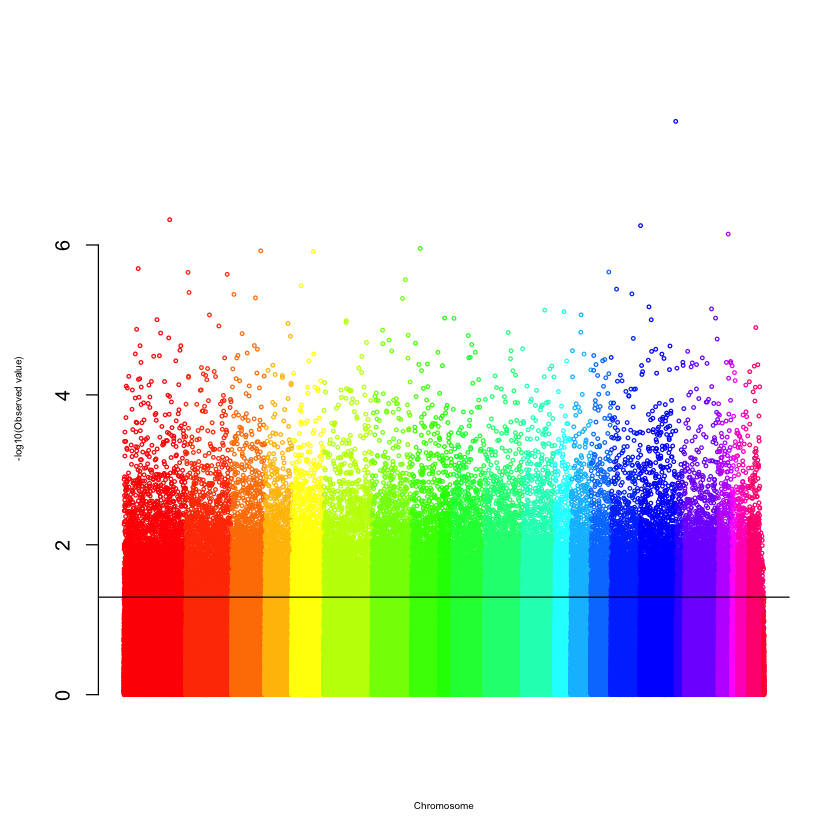

Plotting points  1 - 46857 
Plotting points  46858 - 81667 
Plotting points  81668 - 106826 
Plotting points  106827 - 127290 
Plotting points  127291 - 151617 
Plotting points  151618 - 188228 
Plotting points  188229 - 218245 
Plotting points  218246 - 239195 
Plotting points  239196 - 249056 
Plotting points  249057 - 273444 
Plotting points  273445 - 302238 
Plotting points  302239 - 326777 
Plotting points  326778 - 339062 
Plotting points  339063 - 354140 
Plotting points  354141 - 369399 
Plotting points  369400 - 391368 
Plotting points  391369 - 419247 
Plotting points  419248 - 425169 
Plotting points  425170 - 450690 
Plotting points  450691 - 461069 
Plotting points  461070 - 465312 
Plotting points  465313 - 473864 
Plotting points  473865 - 485096 
Plotting points  485097 - 485512 


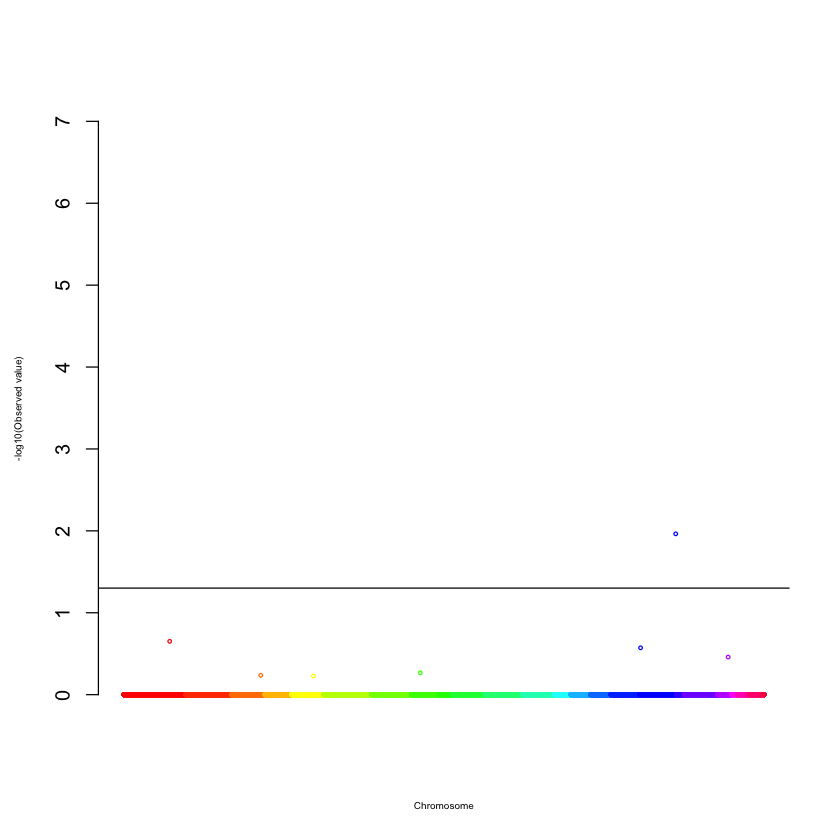

Plotting points  1 - 46857 
Plotting points  46858 - 81667 
Plotting points  81668 - 106826 
Plotting points  106827 - 127290 
Plotting points  127291 - 151617 
Plotting points  151618 - 188228 
Plotting points  188229 - 218245 
Plotting points  218246 - 239195 
Plotting points  239196 - 249056 
Plotting points  249057 - 273444 
Plotting points  273445 - 302238 
Plotting points  302239 - 326777 
Plotting points  326778 - 339062 
Plotting points  339063 - 354140 
Plotting points  354141 - 369399 
Plotting points  369400 - 391368 
Plotting points  391369 - 419247 
Plotting points  419248 - 425169 
Plotting points  425170 - 450690 
Plotting points  450691 - 461069 
Plotting points  461070 - 465312 
Plotting points  465313 - 473864 
Plotting points  473865 - 485096 
Plotting points  485097 - 485512 


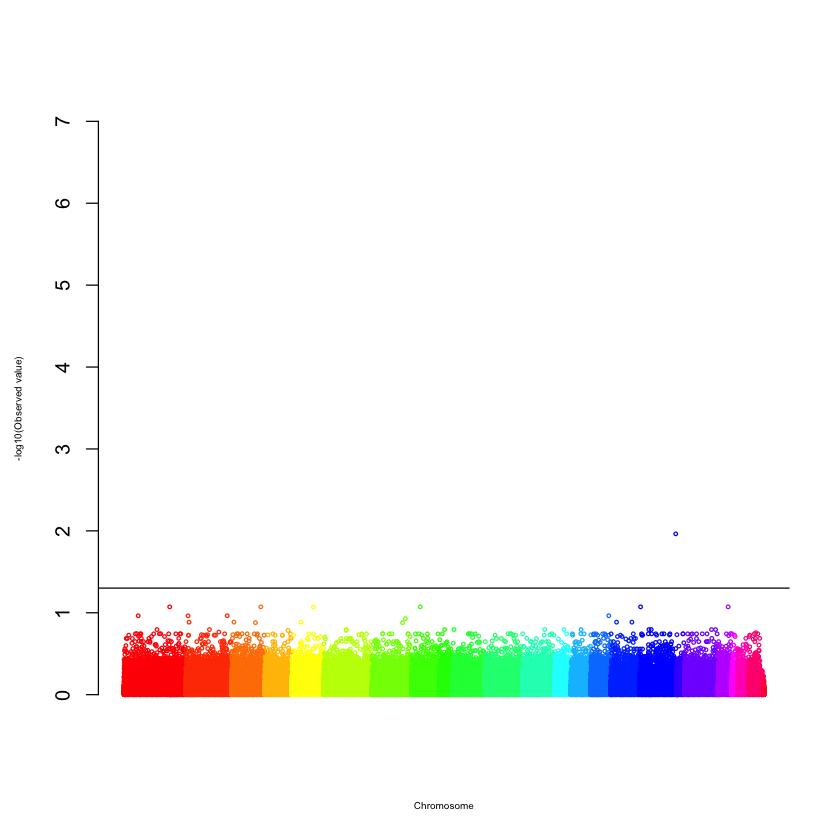

In [57]:
Manhattan_raw = data.frame(ttest_co_inverted_annotated$CHR, ttest_co_inverted_annotated$MAPINFO, ttest_co_inverted_annotated$p_values_ttest)
Manhattan_Bonf = data.frame(ttest_co_inverted_annotated$CHR, ttest_co_inverted_annotated$MAPINFO, ttest_co_inverted_annotated$corr_p_v_Bonferroni)
Manhattan_BenHo = data.frame(ttest_co_inverted_annotated$CHR, ttest_co_inverted_annotated$MAPINFO, ttest_co_inverted_annotated$cor_p_v_Benj_Hoch)

Manhattan_raw$ttest_co_inverted_annotated.CHR = factor(Manhattan_raw$ttest_co_inverted_annotated.CHR, levels = c("1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","X","Y"))
Manhattan_Bonf$ttest_co_inverted_annotated.CHR = factor(Manhattan_Bonf$ttest_co_inverted_annotated.CHR, levels = c("1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","X","Y"))
Manhattan_BenHo$ttest_co_inverted_annotated.CHR = factor(Manhattan_BenHo$ttest_co_inverted_annotated.CHR, levels = c("1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","X","Y"))

palette = rainbow(24)
# par(mfrow = c(0.5, 0.5))

# Manhattan plot raw p-values
mhtplot(Manhattan_raw,control=mht.control(colors=palette))
axis(2,cex=0.5)
abline(a=-log10(0.05),b=0)

# Manhattan plot bonf corrected p-values
mhtplot(Manhattan_Bonf,control=mht.control(colors=palette), ylim = c(0,7))
axis(2,cex=0.5)
abline(a=-log10(0.05),b=0)

# Manhattan plot BH corrected p-values
mhtplot(Manhattan_BenHo,control=mht.control(colors=palette), ylim = c(0,7))
axis(2,cex=0.5)
abline(a=-log10(0.05),b=0)

From top to bottom the plots show the raw data, the data corrected with  Bonferroni corrected p-values
and at the bottom data with Benjamini Hochberg corrected p-values. Again we can see that only the first plot shows many datapoints above the assigned *p-*value threshold of 0.05. While for both plots that have been corrected for multiple testing only one datapoint each is above the threshold.

# 13.
#### Optional 
Downsyndrom is caused by trisomy of the chromosome 21. 

* Here we try to plot the density of the methylation values of the probes mapping on chromosome 21. 
* We try to determine if we can see a clear difference between the samples 
* Determine the number of differentially methylated probes on chromosome 21.

In [59]:
# loading information of hte chromosome 12 from illumina manifest:
chr21 = Illumina450Manifest_clean[Illumina450Manifest_clean$CHR==21,]
chr21 = droplevels(chr21)

In [60]:
# Computing beta value to estimate the methylation levels of the probes
beta_chr21 = beta[rownames(beta) %in% chr21$IlmnID,]

In [89]:
# selecting corresponding columns WT: 3,4,5,8
wt_beta_chr21 = beta_chr21[, c(3:5,8)]

# selecting DS cols 1,2,6,7
ds_beta_chr21 = beta_chr21[, c(1,2,6,7)]

For creating a plot showing the methylation levels we need to compute the $\mu$ of $\beta$ and use the density function.

In [90]:
# Mean
wt_mean_beta_chr21 = apply(wt_beta_chr21,1,mean,na.rm=T) # WT
ds_mean_beta_chr21 = apply(ds_beta_chr21,1,mean,na.rm=T) # DS

wt_density_mean_beta_chr21 = density(wt_mean_beta_chr21) # WT density 
ds_density_mean_beta_chr21 = density(ds_mean_beta_chr21) # DS density

Now the same for data normalized with Noob again for both WT and DS.

In [91]:
# normalized beta for chr 21
norm_beta_chr21 = beta_preprocessNoob[rownames(beta_preprocessNoob) %in% chr21$IlmnID,]

# selecting corresponding columns WT: 3,4,5,8
wt_norm_beta_chr21 = norm_beta_chr21[, c(3:5,8)]

# selecting DS cols 1,2,6,7
ds_norm_beta_chr21 = norm_beta_chr21[, c(1,2,6,7)]

#### Computing the mean:

In [92]:
wt_mean_norm_beta_chr21 = apply(wt_norm_beta_chr21,1,mean,na.rm=T)
ds_mean_norm_beta_chr21 = apply(ds_norm_beta_chr21,1,mean,na.rm=T)

#### Computing the density function

In [93]:
norm_wt_density_mean_beta_chr21 = density(wt_mean_norm_beta_chr21)
norm_ds_density_mean_beta_chr21 = density(ds_mean_norm_beta_chr21)

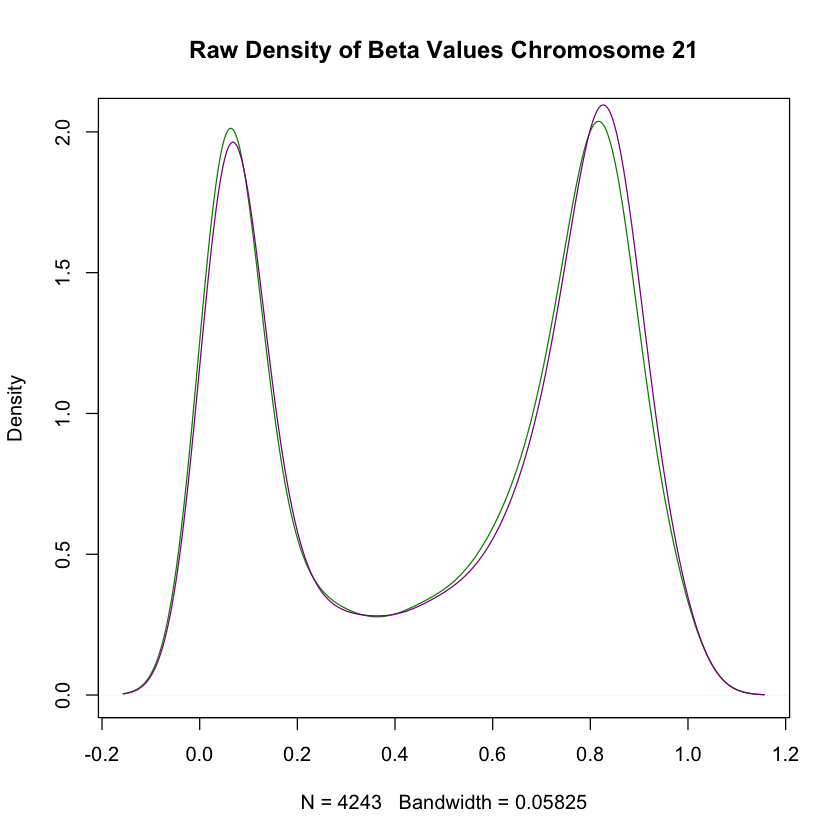

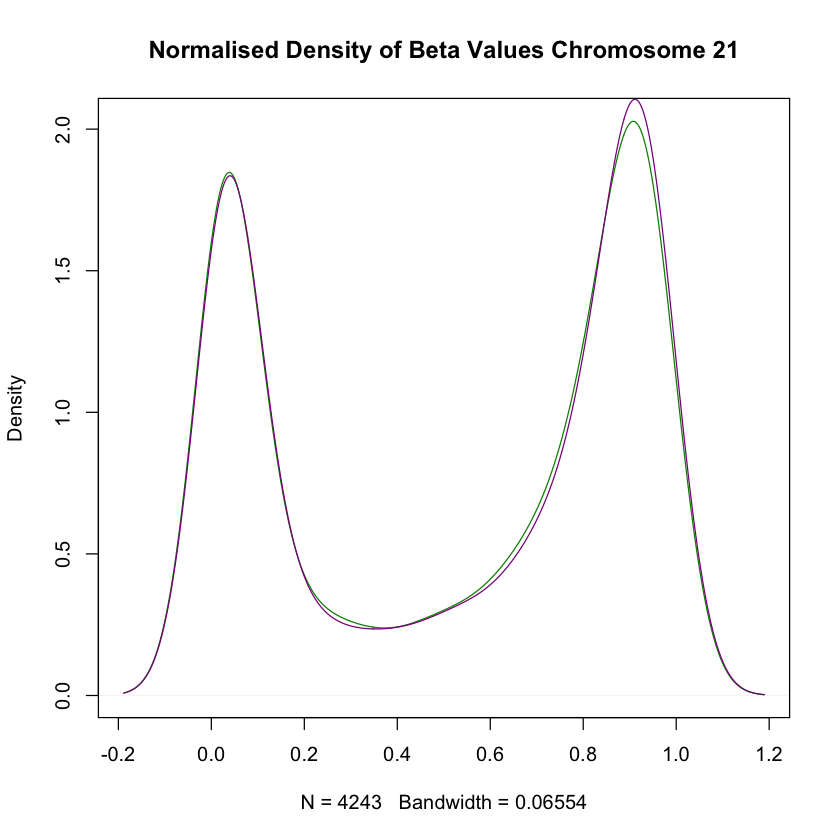

In [96]:
par(mfrow=c(1,1))


plot(ds_density_mean_beta_chr21,main="Raw Density of Beta Values Chromosome 21",col="green4")
lines (wt_density_mean_beta_chr21,col="darkmagenta")
# normalized
plot(norm_ds_density_mean_beta_chr21,main="Normalised Density of Beta Values Chromosome 21",col="green4")
lines (norm_wt_density_mean_beta_chr21,col="darkmagenta")

In the figure above we can see that both graphs show a similar distribution when comparing WT and DS samples.

Nest steps:
* comparison between the two groups: 
* we apply a t-student test:

In [110]:
pValues_ttest_chr21 = apply(norm_beta_chr21,1, t_test_f)

* data frame containing both the beta values and the beta values.

In [111]:
final_ttest_chr21 = data.frame(norm_beta_chr21, pValues_ttest_chr21)

* selecting just statistically significant ones ( $\alpha$ = 0.05).
* checking number of statistically significan probes that are differentially methylated.

In [112]:
final_ttest_chr21_0.05 = final_ttest_chr21[final_ttest_chr21$pValues_ttest_chr21<=0.05,]
dim(final_ttest_chr21_0.05)


[1] 587   9

* performing  multiple test corrections:
   - Bonferroni
   - Benjamini-Hochberg


In [113]:
raw_pValues_chr21 = final_ttest_chr21[,9]
corrected_pValues_BH_chr21 = p.adjust(raw_pValues_chr21,"BH") 
corrected_pValues_Bonf_chr21 = p.adjust(raw_pValues_chr21,"bonferroni")  


* Selecting probes below $\alpha$ of 0.05:

In [115]:
corrected_pValues_BH_chr21_0.05 = final_ttest_chr21[final_ttest_chr21$corrected_pValues_BH_chr21<=0.05,]
corrected_pValues_Bonf_chr21_0.05 = final_ttest_chr21[final_ttest_chr21$corrected_pValues_Bonf_chr21<=0.05,]


* Checking the dimensions: Since there where no statistically significant probes after correction before it is likely that it will the the same here too:

In [122]:
dim(corrected_pValues_BH_chr21_0.05)
dim(corrected_pValues_Bonf_chr21_0.05)

[1] 0 9

[1] 0 9

<table>
<thead>
<tr class="header">
<th align="center"> p-values</th>
<th align="left">differentially methylated probes</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td align="center">Raw</td>
<td align="left">598</td>
</tr>
<tr class="even">
<td align="center">Bonferroni</td>
<td align="left">0</td>
</tr>
<tr class="odd">
<td align="center">Benjamini-Hochberg</td>
<td align="left">0</td>
</tr>
</tbody>
</table>